<a href="https://colab.research.google.com/github/31indianaSKKU/SportsBigDataAnalysis_2022FALL/blob/main/kaggle_tutorial_marchmadness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mens-march-mania-2022/MDataFiles_Stage2/Conferences.csv
/kaggle/input/mens-march-mania-2022/MDataFiles_Stage2/MMasseyOrdinals_thruDay128.csv
/kaggle/input/mens-march-mania-2022/MDataFiles_Stage2/MNCAATourneySeedRoundSlots.csv
/kaggle/input/mens-march-mania-2022/MDataFiles_Stage2/MRegularSeasonDetailedResults.csv
/kaggle/input/mens-march-mania-2022/MDataFiles_Stage2/MNCAATourneyCompactResults.csv
/kaggle/input/mens-march-mania-2022/MDataFiles_Stage2/MGameCities.csv
/kaggle/input/mens-march-mania-2022/MDataFiles_Stage2/MSampleSubmissionStage2.csv
/kaggle/input/mens-march-mania-2022/MDataFiles_Stage2/MSeasons.csv
/kaggle/input/mens-march-mania-2022/MDataFiles_Stage2/MSecondaryTourneyTeams.csv
/kaggle/input/mens-march-mania-2022/MDataFiles_Stage2/Cities.csv
/kaggle/input/mens-march-mania-2022/MDataFiles_Stage2/MTeamSpellings.csv
/kaggle/input/mens-march-mania-2022/MDataFiles_Stage2/MRegularSeasonCompactResults.csv
/kaggle/input/mens-march-mania-2022/MDataFiles_Stage2/MSeconda

Special thanks to the following notebook:

https://www.kaggle.com/theoviel/ncaa-starter-the-simpler-the-better


<h1><span style= "color:blue ; font-style: italic ;font-weight: bold"> 목차</span></h1><br>
<h2><span style= "font-style: italic"> I. 개요</h2><br>

<h2><span style= "font-style: italic"> ***************STAGE_1(2016,17,18,19 & 21년 예측) </h2><br>    
<h2><span style= "font-style: italic"> II. 탐색적 데이터 분석(EDA) & 데이터 준비(Data preparation)</h2><br>
<h4>1. 라이브러리 설치</h4><br>
<h4>2. 데이터 저장 & 탐색적 데이터 분석(EDA) </h4><br>

<h2><span style= "font-style: italic"> III. 변수가공(Features Engineering)</h2><br>

<h4>1. 훈련 데이터 </h4><br>

<h4>2. 테스트 데이터</h4><br>
    
<h4>3. 출력변수</h4><br>

<h2><span style= "font-style: italic"> IV. 모델링</h2><br>

<h2><span style= "font-style: italic"> V. 제출</h2><br>
    
<h2><span style= "font-style: italic"> *****************STAGE_2(2022년 결과예측, STAGE_1프로세스와 동일) </h2><br> 
    


# I. 개요
* <h3>TheoViel(notebook:ncaa-starter-the-simpler-the-better)</h3><br>
<h5>주요입력변수</h5><br> WinRatio(승률)/WinRatioDiff(양팀승률차)/<br>GapAvg(평균점수차)/GapAvgDiff(양팀평균점수차차이)/<br>SeedDiff(양팀시드차) </h5><br>
<h5>모델링: K-fold cross validation</h5><br>

* <h3>Jaeyoung</h3><br>
<h5>전략적 데이터 탐색(EDA)</h5><br>
<h5>모델링: Naive Bayes/Random Forest/Gradient Boosting/XGBoost/Blended Model</h5><br>


# ***************STAGE_1(2016,17,18,19 & 21년 예측)

# II. 탐색적 데이터 분석(EDA) & 데이터 준비(Data preparation)

<h4>1. 라이브러리 설치</h4><br>

In [ ]:
import numpy as np             # linear algebra
import pandas as pd            # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import re                      # Importing the Regular Expression Module...

# from pylab import rcParams      #그래프 조정
pd.set_option('display.max_columns', None)

#Visualization
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import glob


#Models
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, r2_score
from sklearn.metrics import f1_score
from xgboost import XGBClassifier as xgb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import ModelCheckpoint, EarlyStopping



# #데이터프레임 전체 출력
# # row 생략 없이 출력
# pd.set_option('display.max_rows', 300)
# # col 생략 없이 출력
# pd.set_option('display.max_columns', None)

In [ ]:
DATA_PATH_stage1 = '/kaggle/input/mens-march-mania-2022/MDataFiles_Stage1/'
DATA_PATH_stage2 = '/kaggle/input/mens-march-mania-2022/MDataFiles_Stage2/'

for filename in os.listdir(DATA_PATH_stage1):
    print(filename)
    
# for filename in os.listdir(DATA_PATH_stage2):
#     print(filename)

Conferences.csv
MNCAATourneySeedRoundSlots.csv
MRegularSeasonDetailedResults.csv
MNCAATourneyCompactResults.csv
MGameCities.csv
MSeasons.csv
MSecondaryTourneyTeams.csv
Cities.csv
MTeamSpellings.csv
MRegularSeasonCompactResults.csv
MMasseyOrdinals.csv
MSecondaryTourneyCompactResults.csv
MNCAATourneySlots.csv
MNCAATourneySeeds.csv
MTeamCoaches.csv
MConferenceTourneyGames.csv
MNCAATourneyDetailedResults.csv
MSampleSubmissionStage1.csv
MTeamConferences.csv
MTeams.csv


<h2> 데이터 저장 & 탐색적 데이터 분석(EDA)  </h2><br>


* shape: 데이터프레임 size 확인
* head( ): 데이터프레임 확인(상위 5행)
* info( ): 데이터프레임 정보확인
* describe( ): 기초통계량 확인
* unique( ): unique값 확인
* value_counts( ): unique값별 갯수 확인
* plt.hist( ): 히스토그램 확인
* isna( ).sum( ): 결측치 확인




<h3>Seeds</h3>

In [ ]:
#데이터 저장
df_seeds = pd.read_csv(DATA_PATH_stage1 + "MNCAATourneySeeds.csv")
len(df_seeds)

2354

In [ ]:
df_seeds.shape                       #데이터프레임 size 확인

(2354, 3)

In [ ]:
df_seeds.head()                      #데이터프레임 확인(상위 5행)

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [ ]:
df_seeds.info()                       #데이터프레임 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Season  2354 non-null   int64 
 1   Seed    2354 non-null   object
 2   TeamID  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [ ]:
df_seeds.describe()            #기초통계량 확인

,Season,TeamID
count,2354.000000,2354.000000
mean,2002.762532,1291.574766
std,10.475078,103.315557
min,1985.000000,1101.000000
25%,1994.000000,1208.250000
50%,2003.000000,1287.000000
75%,2012.000000,1387.000000
max,2021.000000,1463.000000


In [ ]:
df_seeds.isna().sum()                  #결측치 확

Season    0
Seed      0
TeamID    0
dtype: int64

In [ ]:
df_seeds['Season'].unique()             #unique값 확인

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2021])

In [ ]:
len(df_seeds['Season'].unique())            #unique 갯수 확인

36

In [ ]:
df_seeds['Season'].value_counts()      #Season별 갯수 확인

2021    68
2015    68
2011    68
2012    68
2014    68
2013    68
2016    68
2017    68
2018    68
2019    68
2004    65
2010    65
2009    65
2008    65
2007    65
2006    65
2005    65
2003    65
2001    65
2002    65
1986    64
1993    64
1987    64
1988    64
1989    64
1990    64
1991    64
1992    64
1994    64
1995    64
1996    64
1997    64
1998    64
1999    64
2000    64
1985    64
Name: Season, dtype: int64

In [ ]:
#plt.figure()   #그래프 설정 reset

In [ ]:
# df_seeds['Season'].hist()            #히스토그램

(array([256., 256., 192., 256., 194., 260., 260., 204., 272., 204.]),
 array([1985. , 1988.6, 1992.2, 1995.8, 1999.4, 2003. , 2006.6, 2010.2,
        2013.8, 2017.4, 2021. ]),
 <BarContainer object of 10 artists>)

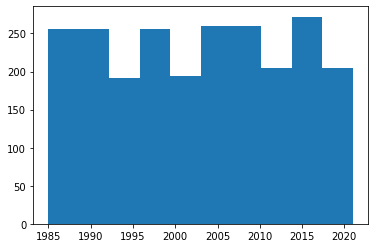

In [ ]:
plt.hist(df_seeds['Season'])

In [ ]:
df_seeds['Seed'].describe()          #정보 확인(문자열)

count     2354
unique      90
top        W01
freq        36
Name: Seed, dtype: object

In [ ]:
df_seeds['Seed'].unique()           #unique값 확인

array(['W01', 'W02', 'W03', 'W04', 'W05', 'W06', 'W07', 'W08', 'W09',
       'W10', 'W11', 'W12', 'W13', 'W14', 'W15', 'W16', 'X01', 'X02',
       'X03', 'X04', 'X05', 'X06', 'X07', 'X08', 'X09', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'Y01', 'Y02', 'Y03', 'Y04',
       'Y05', 'Y06', 'Y07', 'Y08', 'Y09', 'Y10', 'Y11', 'Y12', 'Y13',
       'Y14', 'Y15', 'Y16', 'Z01', 'Z02', 'Z03', 'Z04', 'Z05', 'Z06',
       'Z07', 'Z08', 'Z09', 'Z10', 'Z11', 'Z12', 'Z13', 'Z14', 'Z15',
       'Z16', 'Y16a', 'Y16b', 'W16a', 'W16b', 'X16a', 'X16b', 'Z16a',
       'Z16b', 'W12a', 'W12b', 'Z11a', 'Z11b', 'X12a', 'X12b', 'Z14a',
       'Z14b', 'Y11a', 'Y11b', 'Z13a', 'Z13b', 'Y12a', 'Y12b', 'W11a',
       'W11b', 'X11a', 'X11b'], dtype=object)

In [ ]:
df_seeds['Seed'].value_counts()       #Seed별 갯수 확인

W01     36
X14     36
Y01     36
Y02     36
Y03     36
        ..
Y12a     1
Y12b     1
W12b     1
W12a     1
Z14a     1
Name: Seed, Length: 90, dtype: int64

In [ ]:
# df_seeds['Seed'].hist(grid=False)     #히스토그램

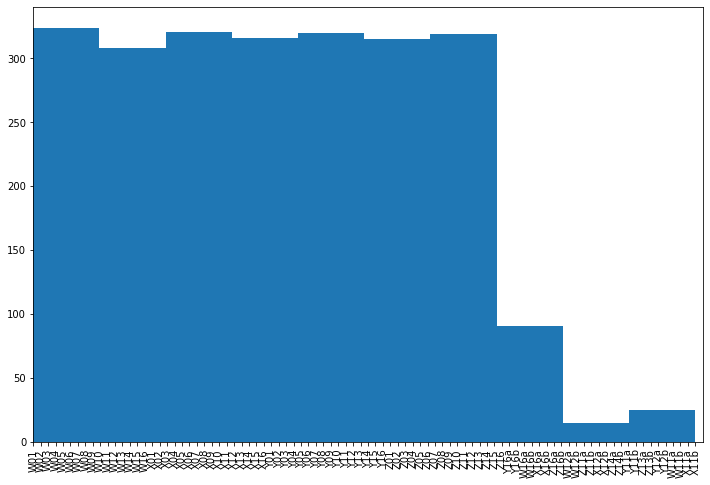

In [ ]:
fig = plt.figure(figsize=[12,8])          #그래프 size설정
plt.hist(df_seeds['Seed'])
plt.xlim([0,90])
# plt.rcParams["figure.figsize"] = [5,20]  # 가로, 세로 인치 조정
# plt.rcParams["figure.dpi"] = 500         # 해상도 조정
_=plt.xticks(rotation=90)                  #x축 텍스트 방향 설

In [ ]:
len(df_seeds['TeamID'].unique())            #팀 수 확인

302

<h3>Season_results</h3>

In [ ]:
#데이터 저장
df_season_results = pd.read_csv(DATA_PATH_stage1 + "MRegularSeasonCompactResults.csv")
df_season_results.drop(['NumOT', 'WLoc'], axis=1, inplace=True)
df_season_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore
0,1985,20,1228,81,1328,64
1,1985,25,1106,77,1354,70
2,1985,25,1112,63,1223,56
3,1985,25,1165,70,1432,54
4,1985,25,1192,86,1447,74


In [ ]:
df_season_results.shape

(174471, 6)

In [ ]:
df_season_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174471 entries, 0 to 174470
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   Season   174471 non-null  int64
 1   DayNum   174471 non-null  int64
 2   WTeamID  174471 non-null  int64
 3   WScore   174471 non-null  int64
 4   LTeamID  174471 non-null  int64
 5   LScore   174471 non-null  int64
dtypes: int64(6)
memory usage: 8.0 MB


In [ ]:
df_season_results.describe()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore
count,174471.000000,174471.000000,174471.000000,174471.000000,174471.000000,174471.000000
mean,2004.535510,74.056049,1287.158210,76.762975,1282.772231,64.663577
std,10.728009,33.821333,104.644657,11.959181,104.750998,11.276145
min,1985.000000,0.000000,1101.000000,34.000000,1101.000000,20.000000
25%,1995.000000,47.000000,1198.000000,69.000000,1191.000000,57.000000
50%,2005.000000,76.000000,1285.000000,76.000000,1281.000000,64.000000
75%,2014.000000,103.000000,1380.000000,84.000000,1375.000000,72.000000
max,2022.000000,132.000000,1472.000000,186.000000,1472.000000,150.000000


In [ ]:
df_season_results.isna().sum()

Season     0
DayNum     0
WTeamID    0
WScore     0
LTeamID    0
LScore     0
dtype: int64

In [ ]:
len(df_season_results['WTeamID'].unique())

372

In [ ]:
df_season_results['WTeamID'].value_counts()

1181    958
1242    949
1246    898
1314    887
1112    878
       ... 
1471     12
1289      6
1118      6
1472      5
1327      3
Name: WTeamID, Length: 372, dtype: int64

(array([15902., 17352., 18050., 17396., 19590., 15550., 18531., 18005.,
        18463., 15632.]),
 array([1101. , 1138.1, 1175.2, 1212.3, 1249.4, 1286.5, 1323.6, 1360.7,
        1397.8, 1434.9, 1472. ]),
 <BarContainer object of 10 artists>)

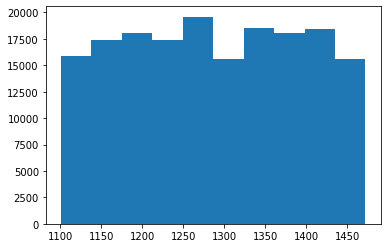

In [ ]:
plt.hist(df_season_results['WTeamID'])

In [ ]:
len(df_season_results['LTeamID'].unique())

372

In [ ]:
df_season_results['LTeamID'].value_counts()

1152    795
1271    767
1363    736
1341    728
1224    714
       ... 
1471     22
1118     21
1327     19
1468     18
1472     14
Name: LTeamID, Length: 372, dtype: int64

(array([16453., 19224., 18876., 17088., 18577., 16443., 17469., 17928.,
        17937., 14476.]),
 array([1101. , 1138.1, 1175.2, 1212.3, 1249.4, 1286.5, 1323.6, 1360.7,
        1397.8, 1434.9, 1472. ]),
 <BarContainer object of 10 artists>)

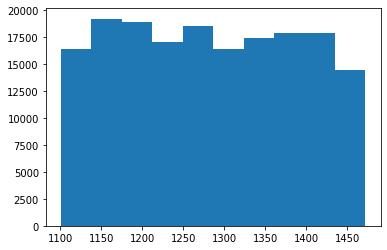

In [ ]:
plt.hist(df_season_results['LTeamID'])

<h4>New Features</h4>



* <span style="font-weight: bold"> ScoreGap: score gap of the game</span><br>
* <span style="font-weight: bold"> NumWins: Number of wins</span><br>
* <span style="font-weight: bold"> NumLosees: Number of losses</span><br>
* <span style="font-weight: bold"> GapWins: Average score gap of wins</span><br>
* <span style="font-weight: bold"> GapLosses: Average score gap of losses</span><br>
* <span style="font-weight: bold"> GapLosses: Average score gap of losses</span><br>
* <span style="font-weight: bold"> WinRatio</span><br>
* <span style="font-weight: bold"> AverageScoreGap</span><br>

In [ ]:
#'ScoreGap': score gap of the game(= 'WScore' - 'LScore')
df_season_results['ScoreGap'] = df_season_results['WScore'] - df_season_results['LScore']

In [ ]:
#확인
df_season_results

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,ScoreGap
0,1985,20,1228,81,1328,64,17
1,1985,25,1106,77,1354,70,7
2,1985,25,1112,63,1223,56,7
3,1985,25,1165,70,1432,54,16
4,1985,25,1192,86,1447,74,12
...,...,...,...,...,...,...,...
174466,2022,98,1400,79,1242,76,3
174467,2022,98,1411,66,1126,63,3
174468,2022,98,1422,68,1441,49,19
174469,2022,98,1438,69,1181,68,1


In [ ]:
df_season_results.isna().sum()

Season      0
DayNum      0
WTeamID     0
WScore      0
LTeamID     0
LScore      0
ScoreGap    0
dtype: int64

In [ ]:
#'WinNums': Number of wins 
num_win = df_season_results.groupby(['Season', 'WTeamID']).count()
num_win = num_win.reset_index()[['Season', 'WTeamID', 'DayNum']].rename(columns={"DayNum": "NumWins", "WTeamID": "TeamID"})

In [ ]:
#확인
num_win

,Season,TeamID,NumWins
0,1985,1102,5
1,1985,1103,9
2,1985,1104,21
3,1985,1106,10
4,1985,1108,19
...,...,...,...
12276,2022,1468,9
12277,2022,1469,7
12278,2022,1470,8
12279,2022,1471,8


In [ ]:
num_win.isna().sum()

Season     0
TeamID     0
NumWins    0
dtype: int64

In [ ]:
#'NumLosses': Number of losses 
num_loss = df_season_results.groupby(['Season', 'LTeamID']).count()
num_loss = num_loss.reset_index()[['Season', 'LTeamID', 'DayNum']].rename(columns={"DayNum": "NumLosses", "LTeamID": "TeamID"})

In [ ]:
#확인
num_loss

,Season,TeamID,NumLosses
0,1985,1102,19
1,1985,1103,14
2,1985,1104,9
3,1985,1106,14
4,1985,1108,6
...,...,...,...
12290,2022,1468,11
12291,2022,1469,12
12292,2022,1470,13
12293,2022,1471,12


In [ ]:
num_loss.isna().sum()

Season       0
TeamID       0
NumLosses    0
dtype: int64

In [ ]:
#'GapWins': Average score gap of wins 
gap_win = df_season_results.groupby(['Season', 'WTeamID']).mean().reset_index()
gap_win = gap_win[['Season', 'WTeamID', 'ScoreGap']].rename(columns={"ScoreGap": "GapWins", "WTeamID": "TeamID"})

In [ ]:
#확인
gap_win

,Season,TeamID,GapWins
0,1985,1102,10.000000
1,1985,1103,7.555556
2,1985,1104,13.190476
3,1985,1106,9.500000
4,1985,1108,13.842105
...,...,...,...
12276,2022,1468,10.666667
12277,2022,1469,11.428571
12278,2022,1470,11.125000
12279,2022,1471,10.125000


In [ ]:
gap_win.isna().sum()

Season     0
TeamID     0
GapWins    0
dtype: int64

In [ ]:
#'GapLosses': Average score gap of losses 
gap_loss = df_season_results.groupby(['Season', 'LTeamID']).mean().reset_index()
gap_loss = gap_loss[['Season', 'LTeamID', 'ScoreGap']].rename(columns={"ScoreGap": "GapLosses", "LTeamID": "TeamID"})

In [ ]:
gap_loss

,Season,TeamID,GapLosses
0,1985,1102,9.947368
1,1985,1103,9.857143
2,1985,1104,4.777778
3,1985,1106,13.285714
4,1985,1108,10.666667
...,...,...,...
12290,2022,1468,16.545455
12291,2022,1469,19.333333
12292,2022,1470,11.769231
12293,2022,1471,13.416667


In [ ]:
gap_loss.isna().sum()

Season       0
TeamID       0
GapLosses    0
dtype: int64

In [ ]:
#Merge
df_features_season_w = df_season_results.groupby(['Season', 'WTeamID']).count().reset_index()[['Season', 'WTeamID']].rename(columns={"WTeamID": "TeamID"})
df_features_season_l = df_season_results.groupby(['Season', 'LTeamID']).count().reset_index()[['Season', 'LTeamID']].rename(columns={"LTeamID": "TeamID"})

In [ ]:
#확인
df_features_season_w

,Season,TeamID
0,1985,1102
1,1985,1103
2,1985,1104
3,1985,1106
4,1985,1108
...,...,...
12276,2022,1468
12277,2022,1469
12278,2022,1470
12279,2022,1471


In [ ]:
len(df_features_season_w['TeamID'].unique())

372

In [ ]:
#확인
df_features_season_l

,Season,TeamID
0,1985,1102
1,1985,1103
2,1985,1104
3,1985,1106
4,1985,1108
...,...,...
12290,2022,1468
12291,2022,1469
12292,2022,1470
12293,2022,1471


In [ ]:
len(df_features_season_l['TeamID'].unique())

372

In [ ]:
#Merge
df_features_season = pd.concat([df_features_season_w, df_features_season_l], 0).drop_duplicates().sort_values(['Season', 'TeamID']).reset_index(drop=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  


In [ ]:
#확인
df_features_season

,Season,TeamID
0,1985,1102
1,1985,1103
2,1985,1104
3,1985,1106
4,1985,1108
...,...,...
12294,2022,1468
12295,2022,1469
12296,2022,1470
12297,2022,1471


In [ ]:
len(df_features_season['TeamID'].unique())

372

In [ ]:
df_features_season.isna().sum()

Season    0
TeamID    0
dtype: int64

In [ ]:
df_features_season = df_features_season.merge(num_win, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(num_loss, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(gap_win, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(gap_loss, on=['Season', 'TeamID'], how='left')

In [ ]:
#결측치 확인
df_features_season.isna().sum()

Season        0
TeamID        0
NumWins      18
NumLosses     4
GapWins      18
GapLosses     4
dtype: int64

In [ ]:
#결측치 포함 행 추출
df_features_season.loc[df_features_season['NumWins'].isna()] 

,Season,TeamID,NumWins,NumLosses,GapWins,GapLosses
325,1986,1159,NaN,22.0,NaN,11.000000
701,1987,1271,NaN,24.0,NaN,17.416667
2218,1992,1341,NaN,26.0,NaN,35.076923
2515,1993,1341,NaN,23.0,NaN,27.782609
2951,1995,1142,NaN,26.0,NaN,29.730769
3421,1996,1341,NaN,23.0,NaN,25.956522
4266,1999,1251,NaN,20.0,NaN,17.400000
4548,2000,1212,NaN,28.0,NaN,18.750000
4586,2000,1258,NaN,26.0,NaN,19.653846
6297,2005,1366,NaN,28.0,NaN,23.250000


In [ ]:
# len(df_features_season.loc[df_features_season['NumWins'].isna()])

In [ ]:
#결측치 발생 원인 파악(결측치 발생한 teamID로 인덱스를 설정 및 조회)
# df_features_season.set_index("TeamID", inplace = True)
# df_features_season

In [ ]:
# df_features_season.loc[1159]  #확인결과 해당시즌에는 승리가 없음. -> '0' 처리

In [ ]:
# df_features_season_w.set_index("TeamID", inplace = True)
# df_features_season_w

In [ ]:
# df_features_season_w.loc[1159]

In [ ]:
#index값 초기화
# df_features_season.drop(['level_0','index'], axis=1, inplace = True)
# df_features_season.reset_index(drop=False, inplace = True)
#df_features_season_w.reset_index(drop=False, inplace = True)

In [ ]:
# df_features_season

In [ ]:
# df_features_season_w

In [ ]:
df_features_season.loc[df_features_season['NumLosses'].isna()]

,Season,TeamID,NumWins,NumLosses,GapWins,GapLosses
1989,1991,1424,30.0,NaN,28.933333,NaN
9474,2014,1455,33.0,NaN,15.060606,NaN
9622,2015,1246,34.0,NaN,20.941176,NaN
11693,2021,1211,26.0,NaN,23.000000,NaN


In [ ]:
len(df_features_season.loc[df_features_season['NumLosses'].isna()])

4

In [ ]:
#결측값 0으로 대체 
df_features_season.fillna(0, inplace=True)  

In [ ]:
#결측치 재확인
df_features_season.isna().sum()

Season       0
TeamID       0
NumWins      0
NumLosses    0
GapWins      0
GapLosses    0
dtype: int64

In [ ]:
df_features_season.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12299 entries, 0 to 12298
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Season     12299 non-null  int64  
 1   TeamID     12299 non-null  int64  
 2   NumWins    12299 non-null  float64
 3   NumLosses  12299 non-null  float64
 4   GapWins    12299 non-null  float64
 5   GapLosses  12299 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 672.6 KB


In [ ]:
df_features_season.head()

,Season,TeamID,NumWins,NumLosses,GapWins,GapLosses
0,1985,1102,5.0,19.0,10.000000,9.947368
1,1985,1103,9.0,14.0,7.555556,9.857143
2,1985,1104,21.0,9.0,13.190476,4.777778
3,1985,1106,10.0,14.0,9.500000,13.285714
4,1985,1108,19.0,6.0,13.842105,10.666667


In [ ]:
#'WinRatio' = NumWins / (NumWins + NumLosses)
df_features_season['WinRatio'] = df_features_season['NumWins'] / (df_features_season['NumWins'] + df_features_season['NumLosses'])

In [ ]:
df_features_season

,Season,TeamID,NumWins,NumLosses,GapWins,GapLosses,WinRatio
0,1985,1102,5.0,19.0,10.000000,9.947368,0.208333
1,1985,1103,9.0,14.0,7.555556,9.857143,0.391304
2,1985,1104,21.0,9.0,13.190476,4.777778,0.700000
3,1985,1106,10.0,14.0,9.500000,13.285714,0.416667
4,1985,1108,19.0,6.0,13.842105,10.666667,0.760000
...,...,...,...,...,...,...,...
12294,2022,1468,9.0,11.0,10.666667,16.545455,0.450000
12295,2022,1469,7.0,12.0,11.428571,19.333333,0.368421
12296,2022,1470,8.0,13.0,11.125000,11.769231,0.380952
12297,2022,1471,8.0,12.0,10.125000,13.416667,0.400000


In [ ]:
#결측값 확인
df_features_season['WinRatio'].isna().sum()

0

In [ ]:
#'GapAvg' = (NumWins * GapWins - NumLosses * GapLosses) / (NumWins + NumLosses)
df_features_season['GapAvg'] = (
    (df_features_season['NumWins'] * df_features_season['GapWins'] - 
    df_features_season['NumLosses'] * df_features_season['GapLosses'])
    / (df_features_season['NumWins'] + df_features_season['NumLosses'])
)

In [ ]:
df_features_season

,Season,TeamID,NumWins,NumLosses,GapWins,GapLosses,WinRatio,GapAvg
0,1985,1102,5.0,19.0,10.000000,9.947368,0.208333,-5.791667
1,1985,1103,9.0,14.0,7.555556,9.857143,0.391304,-3.043478
2,1985,1104,21.0,9.0,13.190476,4.777778,0.700000,7.800000
3,1985,1106,10.0,14.0,9.500000,13.285714,0.416667,-3.791667
4,1985,1108,19.0,6.0,13.842105,10.666667,0.760000,7.960000
...,...,...,...,...,...,...,...,...
12294,2022,1468,9.0,11.0,10.666667,16.545455,0.450000,-4.300000
12295,2022,1469,7.0,12.0,11.428571,19.333333,0.368421,-8.000000
12296,2022,1470,8.0,13.0,11.125000,11.769231,0.380952,-3.047619
12297,2022,1471,8.0,12.0,10.125000,13.416667,0.400000,-4.000000


In [ ]:
#결측값 확인
df_features_season['GapAvg'].isna().sum()

0

In [ ]:
#WinRatio & GapAvg만 남기기
df_features_season.drop(['NumWins', 'NumLosses', 'GapWins', 'GapLosses'], axis=1, inplace=True)

In [ ]:
df_features_season

,Season,TeamID,WinRatio,GapAvg
0,1985,1102,0.208333,-5.791667
1,1985,1103,0.391304,-3.043478
2,1985,1104,0.700000,7.800000
3,1985,1106,0.416667,-3.791667
4,1985,1108,0.760000,7.960000
...,...,...,...,...
12294,2022,1468,0.450000,-4.300000
12295,2022,1469,0.368421,-8.000000
12296,2022,1470,0.380952,-3.047619
12297,2022,1471,0.400000,-4.000000


<h3> Tourney_results </h3>

In [ ]:
#data load
df_tourney_results = pd.read_csv(DATA_PATH_stage1 + "MNCAATourneyCompactResults.csv")
df_tourney_results.drop(['NumOT', 'WLoc'], axis=1, inplace=True)

In [ ]:
df_tourney_results.shape

(2317, 6)

In [ ]:
df_tourney_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2317 entries, 0 to 2316
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Season   2317 non-null   int64
 1   DayNum   2317 non-null   int64
 2   WTeamID  2317 non-null   int64
 3   WScore   2317 non-null   int64
 4   LTeamID  2317 non-null   int64
 5   LScore   2317 non-null   int64
dtypes: int64(6)
memory usage: 108.7 KB


In [ ]:
df_tourney_results.describe()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore
count,2317.000000,2317.000000,2317.000000,2317.000000,2317.000000,2317.000000
mean,2002.758308,139.167890,1286.536901,76.891239,1292.018127,65.168321
std,10.471044,4.217412,100.988726,11.836804,103.292844,11.064350
min,1985.000000,134.000000,1101.000000,43.000000,1101.000000,29.000000
25%,1994.000000,136.000000,1210.000000,69.000000,1209.000000,58.000000
50%,2003.000000,137.000000,1276.000000,76.000000,1290.000000,65.000000
75%,2012.000000,139.000000,1385.000000,84.000000,1387.000000,72.000000
max,2021.000000,154.000000,1463.000000,149.000000,1463.000000,115.000000


In [ ]:
df_tourney_results.isna().sum()

Season     0
DayNum     0
WTeamID    0
WScore     0
LTeamID    0
LScore     0
dtype: int64

# 발표 후 추가 작업_PCA, t-SNE 연습_incomplete

In [ ]:
#data load
df_tourney_results_Detailed = pd.read_csv(DATA_PATH_stage1 + "MNCAATourneyDetailedResults.csv")
df_tourney_results_Detailed.drop(['WScore','LScore','NumOT', 'WLoc'], axis=1, inplace=True)

In [ ]:
df_tourney_results_Detailed.shape

(1181, 30)

In [ ]:
df_tourney_results_Detailed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 30 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Season   1181 non-null   int64
 1   DayNum   1181 non-null   int64
 2   WTeamID  1181 non-null   int64
 3   LTeamID  1181 non-null   int64
 4   WFGM     1181 non-null   int64
 5   WFGA     1181 non-null   int64
 6   WFGM3    1181 non-null   int64
 7   WFGA3    1181 non-null   int64
 8   WFTM     1181 non-null   int64
 9   WFTA     1181 non-null   int64
 10  WOR      1181 non-null   int64
 11  WDR      1181 non-null   int64
 12  WAst     1181 non-null   int64
 13  WTO      1181 non-null   int64
 14  WStl     1181 non-null   int64
 15  WBlk     1181 non-null   int64
 16  WPF      1181 non-null   int64
 17  LFGM     1181 non-null   int64
 18  LFGA     1181 non-null   int64
 19  LFGM3    1181 non-null   int64
 20  LFGA3    1181 non-null   int64
 21  LFTM     1181 non-null   int64
 22  LFTA     1181 non-null  

In [ ]:
df_tourney_results_Detailed.describe()

,Season,DayNum,WTeamID,LTeamID,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
count,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000
mean,2011.650296,139.109229,1293.542760,1294.587638,26.344623,55.462320,7.022862,18.298899,15.522439,21.328535,10.523285,25.861135,14.259949,11.447925,6.392887,3.944962,16.324301,22.911939,57.712108,6.254022,20.502964,11.629128,16.617273,10.970364,21.368332,11.409822,12.171041,5.707875,2.939881,18.853514
std,5.274224,4.234734,102.884842,105.945614,4.751158,7.225518,2.965677,5.679989,6.059217,7.681727,3.978822,5.002307,4.341092,3.812563,2.977842,2.526038,3.860358,4.104239,7.300343,2.761999,5.826098,5.114416,6.609636,4.215384,4.463864,3.641061,3.920983,2.670336,2.045817,4.232007
min,2003.000000,134.000000,1101.000000,1101.000000,13.000000,34.000000,0.000000,4.000000,0.000000,1.000000,0.000000,13.000000,3.000000,2.000000,0.000000,0.000000,5.000000,11.000000,37.000000,0.000000,5.000000,0.000000,2.000000,1.000000,8.000000,2.000000,3.000000,0.000000,0.000000,7.000000
25%,2007.000000,136.000000,1211.000000,1210.000000,23.000000,51.000000,5.000000,14.000000,11.000000,16.000000,8.000000,22.000000,11.000000,9.000000,4.000000,2.000000,14.000000,20.000000,53.000000,4.000000,16.000000,8.000000,12.000000,8.000000,18.000000,9.000000,9.000000,4.000000,1.000000,16.000000
50%,2012.000000,137.000000,1277.000000,1295.000000,26.000000,55.000000,7.000000,18.000000,15.000000,21.000000,10.000000,26.000000,14.000000,11.000000,6.000000,4.000000,16.000000,23.000000,58.000000,6.000000,20.000000,11.000000,16.000000,11.000000,21.000000,11.000000,12.000000,6.000000,3.000000,19.000000
75%,2016.000000,139.000000,1393.000000,1393.000000,29.000000,60.000000,9.000000,22.000000,19.000000,26.000000,13.000000,29.000000,17.000000,14.000000,8.000000,5.000000,19.000000,26.000000,63.000000,8.000000,24.000000,15.000000,21.000000,14.000000,24.000000,14.000000,15.000000,7.000000,4.000000,22.000000
max,2021.000000,154.000000,1463.000000,1463.000000,44.000000,84.000000,18.000000,41.000000,38.000000,48.000000,26.000000,43.000000,29.000000,28.000000,20.000000,15.000000,30.000000,36.000000,85.000000,18.000000,42.000000,31.000000,39.000000,29.000000,42.000000,23.000000,27.000000,19.000000,13.000000,33.000000


In [ ]:
df_tourney_results_Detailed.isna().sum()

Season     0
DayNum     0
WTeamID    0
LTeamID    0
WFGM       0
WFGA       0
WFGM3      0
WFGA3      0
WFTM       0
WFTA       0
WOR        0
WDR        0
WAst       0
WTO        0
WStl       0
WBlk       0
WPF        0
LFGM       0
LFGA       0
LFGM3      0
LFGA3      0
LFTM       0
LFTA       0
LOR        0
LDR        0
LAst       0
LTO        0
LStl       0
LBlk       0
LPF        0
dtype: int64

In [ ]:
df_tourney_results_Detailed.head()

,Season,DayNum,WTeamID,LTeamID,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,1411,32,69,11,29,17,26,14,30,17,12,5,3,22,29,67,12,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,1436,31,66,7,23,11,14,11,36,22,16,10,7,8,20,64,4,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,1272,31,59,6,14,16,22,10,27,18,9,7,4,19,25,69,7,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,1166,29,53,3,7,18,25,11,20,15,18,13,1,19,27,60,7,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,1301,27,64,7,20,15,23,18,20,17,13,8,2,14,25,56,9,21,15,20,10,26,16,14,5,8,19


In [ ]:
df_team_stat_w = df_tourney_results_Detailed.groupby(['Season', 'WTeamID','WFGM','WFGA','WFGM3','WFGA3','WFTM','WFTA','WOR','WDR','WAst','WTO','WStl','WBlk','WPF']).count().reset_index()[['Season', 'WTeamID','WFGM','WFGA','WFGM3','WFGA3','WFTM','WFTA','WOR','WDR','WAst','WTO','WStl','WBlk','WPF']].rename(columns={"WTeamID": "TeamID","WFGM": "FGM","WFGA": "FGA","WFGM3": "FGM3","WFGA3": "FGA3","WFTM": "FTM","WFTA": "FTA","WOR": "OR","WDR": "DR","WAst": "Ast","WTO": "TO","WStl": "Stl","WBlk": "Blk","WPF":"PF"})
df_team_stat_l = df_tourney_results_Detailed.groupby(['Season', 'LTeamID','LFGM','LFGA','LFGM3','LFGA3','LFTM','LFTA','LOR','LDR','LAst','LTO','LStl','LBlk','LPF']).count().reset_index()[['Season', 'LTeamID','LFGM','LFGA','LFGM3','LFGA3','LFTM','LFTA','LOR','LDR','LAst','LTO','LStl','LBlk','LPF']].rename(columns={"LTeamID": "TeamID","LFGM": "FGM","LFGA": "FGA","LFGM3": "FGM3","LFGA3": "FGA3","LFTM": "FTM","LFTA": "FTA","LOR": "OR","LDR": "DR","LAst": "Ast","LTO": "TO","LStl": "Stl","LBlk": "Blk","LPF":"PF"})

In [ ]:
df_team_stat_w.head()

,Season,TeamID,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF
0,2003,1112,31,66,7,23,11,14,11,36,22,16,10,7,8
1,2003,1112,34,74,7,24,21,29,18,29,18,9,7,4,20
2,2003,1112,36,76,7,14,9,11,14,30,19,10,12,5,17
3,2003,1113,31,59,6,14,16,22,10,27,18,9,7,4,19
4,2003,1120,24,56,4,19,16,20,12,21,11,14,9,6,18


In [ ]:
df_team_stat_l.head()

,Season,TeamID,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF
0,2003,1104,22,52,5,12,13,16,9,20,13,8,2,6,21
1,2003,1112,23,55,10,22,19,23,11,26,16,19,8,2,17
2,2003,1113,28,69,4,15,16,23,17,14,11,11,7,5,21
3,2003,1120,27,63,10,22,14,17,14,26,15,17,5,5,19
4,2003,1122,24,54,2,21,14,22,8,21,11,18,5,3,18


In [ ]:
df_team_stat = pd.concat([df_team_stat_w, df_team_stat_l], 0).sort_values(['Season', 'TeamID']).reset_index(drop=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
df_team_stat

,Season,TeamID,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF
0,2003,1104,22,52,5,12,13,16,9,20,13,8,2,6,21
1,2003,1112,31,66,7,23,11,14,11,36,22,16,10,7,8
2,2003,1112,34,74,7,24,21,29,18,29,18,9,7,4,20
3,2003,1112,36,76,7,14,9,11,14,30,19,10,12,5,17
4,2003,1112,23,55,10,22,19,23,11,26,16,19,8,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,2021,1452,26,70,11,26,9,11,17,20,18,14,8,1,15
2358,2021,1455,19,56,3,18,11,22,10,23,7,8,7,7,13
2359,2021,1457,21,58,7,22,14,19,9,25,13,10,0,0,23
2360,2021,1458,31,61,13,27,10,12,7,27,15,6,5,8,11


In [ ]:
df_team_stat = df_team_stat.groupby(['Season','TeamID']).sum()

In [ ]:
df_team_stat

FGM  FGA  FGM3  FGA3  FTM  FTA  OR   DR  Ast  TO  Stl  Blk  PF
Season TeamID                                                                
2003   1104     22   52     5    12   13   16   9   20   13   8    2    6  21
       1112    124  271    31    83   60   77  54  121   75  54   37   18  62
       1113     59  128    10    29   32   45  27   41   29  20   14    9  40
       1120     76  176    21    59   38   50  40   71   37  46   18   16  53
       1122     24   54     2    21   14   22   8   21   11  18    5    3  18
...            ...  ...   ...   ...  ...  ...  ..  ...  ...  ..  ...  ...  ..
2021   1439     24   57     7    23   15   21   6   16   11  11    6    2  24
       1452     58  133    20    44   20   26  26   35   34  20   18    5  31
       1455     19   56     3    18   11   22  10   23    7   8    7    7  13
       1457     21   58     7    22   14   19   9   25   13  10    0    0  23
       1458     56  116    21    48   15   19  14   49   28  19    5   13  29

[1199 rows x 13 columns]

In [ ]:
df_team_stat = df_team_stat.reset_index()

In [ ]:
df_team_stat.isna().sum()

Season    0
TeamID    0
FGM       0
FGA       0
FGM3      0
FGA3      0
FTM       0
FTA       0
OR        0
DR        0
Ast       0
TO        0
Stl       0
Blk       0
PF        0
dtype: int64

In [ ]:
df_team_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Season  1199 non-null   int64
 1   TeamID  1199 non-null   int64
 2   FGM     1199 non-null   int64
 3   FGA     1199 non-null   int64
 4   FGM3    1199 non-null   int64
 5   FGA3    1199 non-null   int64
 6   FTM     1199 non-null   int64
 7   FTA     1199 non-null   int64
 8   OR      1199 non-null   int64
 9   DR      1199 non-null   int64
 10  Ast     1199 non-null   int64
 11  TO      1199 non-null   int64
 12  Stl     1199 non-null   int64
 13  Blk     1199 non-null   int64
 14  PF      1199 non-null   int64
dtypes: int64(15)
memory usage: 140.6 KB


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE

In [ ]:
df_team_stat['TeamID'].value_counts()

1242    18
1211    18
1277    18
1458    17
1181    17
        ..
1249     1
1178     1
1389     1
1336     1
1353     1
Name: TeamID, Length: 254, dtype: int64

In [ ]:
df_team_stat['TeamID'].unique()

array([1104, 1112, 1113, 1120, 1122, 1139, 1140, 1141, 1143, 1153, 1160,
       1161, 1163, 1166, 1173, 1181, 1190, 1196, 1211, 1221, 1228, 1231,
       1237, 1242, 1246, 1257, 1261, 1264, 1266, 1268, 1272, 1277, 1280,
       1281, 1301, 1323, 1328, 1329, 1332, 1335, 1338, 1345, 1354, 1356,
       1358, 1360, 1386, 1390, 1393, 1400, 1407, 1409, 1411, 1421, 1423,
       1428, 1429, 1436, 1443, 1447, 1448, 1451, 1454, 1458, 1462, 1102,
       1106, 1130, 1150, 1177, 1186, 1197, 1210, 1227, 1250, 1251, 1284,
       1293, 1305, 1314, 1320, 1334, 1343, 1344, 1350, 1371, 1376, 1403,
       1412, 1416, 1418, 1427, 1431, 1433, 1434, 1435, 1444, 1449, 1105,
       1137, 1151, 1175, 1184, 1192, 1203, 1234, 1235, 1278, 1285, 1307,
       1310, 1324, 1325, 1330, 1368, 1388, 1417, 1437, 1452, 1457, 1107,
       1116, 1125, 1133, 1172, 1206, 1207, 1214, 1233, 1245, 1322, 1326,
       1331, 1361, 1375, 1380, 1397, 1401, 1455, 1148, 1238, 1253, 1275,
       1308, 1317, 1394, 1424, 1425, 1438, 1439, 14

In [ ]:
len(df_team_stat['TeamID'].unique())

254

In [ ]:
df_team_stat.columns

Index(['Season', 'TeamID', 'FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA', 'OR',
       'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF'],
      dtype='object')

In [ ]:
X = df_team_stat[['FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA', 'OR', 'DR', 'Ast', 'TO',
       'Stl', 'Blk', 'PF']]

In [ ]:
X = np.array(X)

In [ ]:
X

array([[ 22,  52,   5, ...,   2,   6,  21],
       [124, 271,  31, ...,  37,  18,  62],
       [ 59, 128,  10, ...,  14,   9,  40],
       ...,
       [ 19,  56,   3, ...,   7,   7,  13],
       [ 21,  58,   7, ...,   0,   0,  23],
       [ 56, 116,  21, ...,   5,  13,  29]])

In [ ]:
X.min(), X.max()

(0, 394)

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
X.min(), X.max()


(-1.3262351080905066, 6.287845510074302)

In [ ]:
# 몇 개의 주성분을 볼 지 결정
pca = PCA(n_components=5)

In [ ]:
pca.fit(X) 


PCA(n_components=5)

In [ ]:
Xnew = pca.transform(X)


In [ ]:
pca.components_   #eigen-vector

array([[ 0.29059552,  0.29272585,  0.26491674,  0.27283278,  0.27745615,
         0.28033633,  0.27518297,  0.28878214,  0.28213808,  0.27677315,
         0.26696888,  0.24848562,  0.28518993],
       [-0.07219775, -0.05114518, -0.58678329, -0.48833964,  0.23295072,
         0.25077142,  0.15488447,  0.07169262, -0.15259603,  0.15400846,
         0.02694571,  0.46382812,  0.01527413],
       [ 0.05686135,  0.02122702,  0.15873695,  0.11265176, -0.3650678 ,
        -0.33497027, -0.07661126,  0.08909173,  0.10383205, -0.03660715,
        -0.22916197,  0.7728571 , -0.19286702],
       [-0.06152978, -0.0545253 ,  0.19261312,  0.13722105,  0.41359095,
         0.35043227, -0.03991903,  0.09072226, -0.10920274, -0.22364876,
        -0.75385693,  0.05716127, -0.01075413],
       [ 0.1682927 ,  0.18186385, -0.20293196, -0.11895408, -0.25151362,
        -0.18189206,  0.66777652,  0.11053107,  0.23924758,  0.09099714,
        -0.42646752, -0.27540746, -0.07444143]])

In [ ]:
pca.explained_variance_ratio_ 


array([0.87647015, 0.03523758, 0.02316315, 0.01744313, 0.01270273])

In [ ]:
# 5개의 주성분은 전체 분산의 약 96%를 설명한다
sum(pca.explained_variance_ratio_) 

0.9650167350570917

In [ ]:
y_data = pca.explained_variance_ratio_
x_data = np.arange(len(y_data))

In [ ]:
y_data

array([0.87647015, 0.03523758, 0.02316315, 0.01744313, 0.01270273])

In [ ]:
x_data

array([0, 1, 2, 3, 4])

In [ ]:
sum_eig_values = np.cumsum(y_data)  #누적sum


In [ ]:
sum_eig_values

array([0.87647015, 0.91170772, 0.93487087, 0.952314  , 0.96501674])

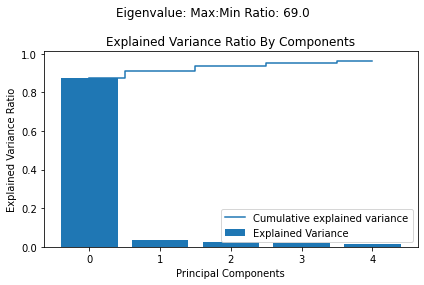

In [ ]:

plt.bar(x_data, y_data, label='Explained Variance')
plt.step(x_data, sum_eig_values, where='mid',
         label='Cumulative explained variance')
plt.suptitle('Eigenvalue: Max:Min Ratio: {}'.format(
    np.round(pca.explained_variance_.max()/pca.explained_variance_.min())))
plt.title('Explained Variance Ratio By Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.tight_layout()



     
PCA 2D Projection

주축 2개로 차원 축소된 데이터 시각화해보기

In [ ]:
pca = PCA(n_components=2)

In [ ]:
pca.fit(X)


PCA(n_components=2)

In [ ]:
pca.explained_variance_ratio_ 


array([0.87647015, 0.03523758])

In [ ]:
Xnew = pca.transform(X)


In [ ]:
Xnew

array([[-2.71352499,  0.43068141],
       [ 6.99022546, -0.24244876],
       [ 0.37115127,  0.59154347],
       ...,
       [-2.65193366,  0.60465577],
       [-2.66819821, -0.23445187],
       [-0.10447509, -0.67495244]])

In [ ]:
principalDf = pd.DataFrame(data = Xnew,
                           columns = ['principal component 1', 'principal component 2'])

In [ ]:
principalDf

,principal component 1,principal component 2
0,-2.713525,0.430681
1,6.990225,-0.242449
2,0.371151,0.591543
3,3.058847,0.294624
4,-2.525424,0.395267
...,...,...
1194,-2.490004,-0.099397
1195,0.332170,-0.905041
1196,-2.651934,0.604656
1197,-2.668198,-0.234452


In [ ]:
finalDf = pd.concat([principalDf, df_team_stat[['TeamID']]], axis=1)

In [ ]:
finalDf

,principal component 1,principal component 2,TeamID
0,-2.713525,0.430681,1104
1,6.990225,-0.242449,1112
2,0.371151,0.591543,1113
3,3.058847,0.294624,1120
4,-2.525424,0.395267,1122
...,...,...,...
1194,-2.490004,-0.099397,1439
1195,0.332170,-0.905041,1452
1196,-2.651934,0.604656,1455
1197,-2.668198,-0.234452,1457


Visualize 2D Projection



Text(0.5, 1.0, '2 component PCA')

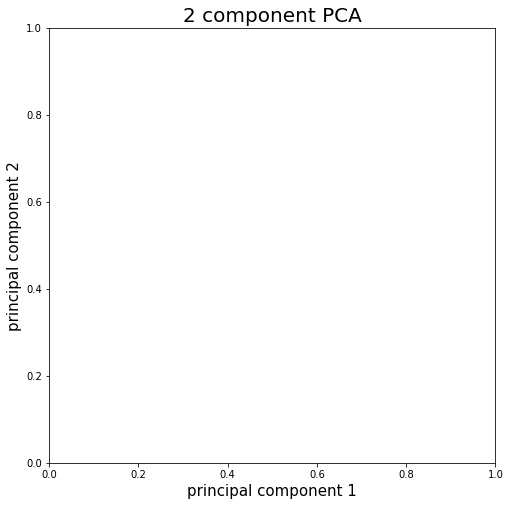

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel(finalDf.columns[0], fontsize = 15)
ax.set_ylabel(finalDf.columns[1], fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

Text(0.5, 1.0, '2 component PCA')

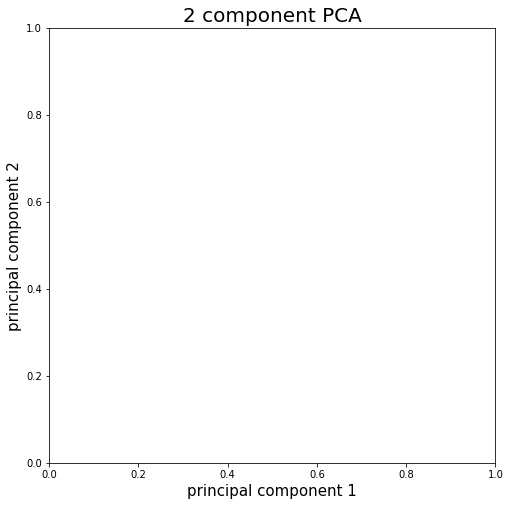

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel(finalDf.columns[0], fontsize = 15)
ax.set_ylabel(finalDf.columns[1], fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

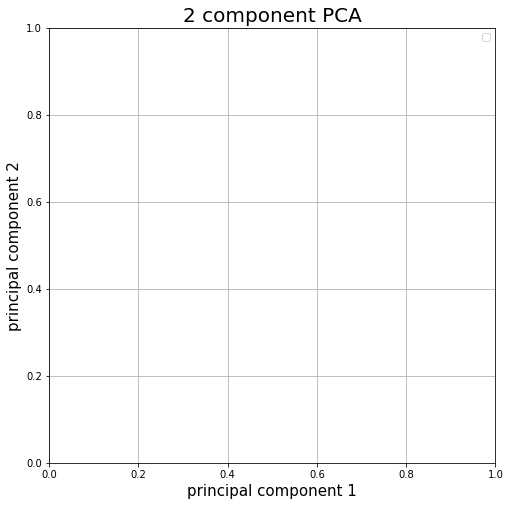

In [ ]:
%matplotlib inline 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel(finalDf.columns[0], fontsize = 15)
ax.set_ylabel(finalDf.columns[1], fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = list(df_team_stat['TeamID'].unique())###################################################
colors = []#####################################################################################

for target, color in zip(targets, colors):
    indicesToKeep = finalDf['TeamID'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c = color,
               s = 50)
    
ax.legend(targets)
ax.grid()
plt.show()

Visualize 3D Projection

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
pca = PCA(n_components=3)


In [ ]:
pca.fit(X)


PCA(n_components=3)

In [ ]:
X_new = pca.transform(X)


In [ ]:
principalDf = pd.DataFrame(data = X_new,
                           columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [ ]:
finalDf = pd.concat([principalDf, df_team_stat[['TeamID']]], axis = 1)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


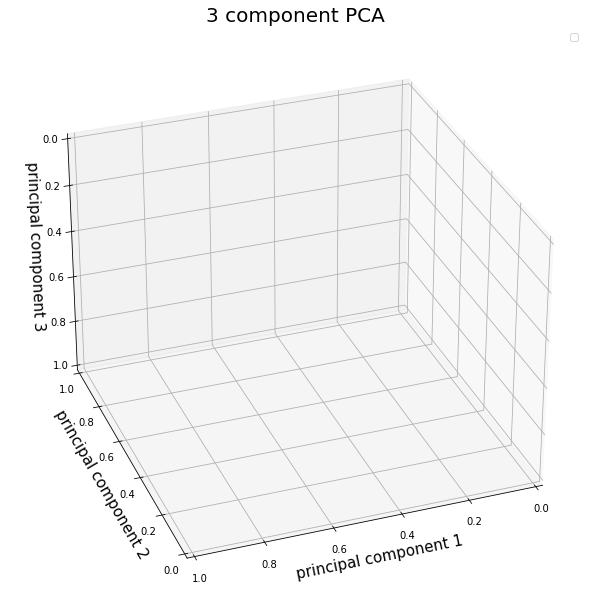

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig, elev=-150, azim=110)

ax.set_xlabel(finalDf.columns[0], fontsize = 15)
ax.set_ylabel(finalDf.columns[1], fontsize = 15)
ax.set_zlabel(finalDf.columns[2], fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = list(df_team_stat['TeamID'].unique())###################################################
colors = []#####################################################################################

for target, color in zip(targets, colors):
    indicesToKeep = finalDf['TeamID'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               finalDf.loc[indicesToKeep, 'principal component 3'],
               c = color,
               s = 50)
    
ax.legend(targets)
ax.grid()

t-SNE

2D

In [ ]:
tsne = TSNE(n_components=2, n_iter=1000)


In [ ]:
tsne_points = tsne.fit_transform(X)


/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
tsne_df = pd.DataFrame(data = tsne_points)


In [ ]:
tsne_df


,0,1
0,-15.215180,-28.643436
1,35.632156,16.307053
2,-12.477530,37.541508
3,22.424500,34.904976
4,-8.718893,-30.899092
...,...,...
1194,6.837263,-23.755434
1195,-1.087636,28.889084
1196,-15.679556,-31.231028
1197,11.801739,-19.391613


In [ ]:
tsne_df2 = pd.concat([tsne_df, df_team_stat[['TeamID']]], axis = 1)


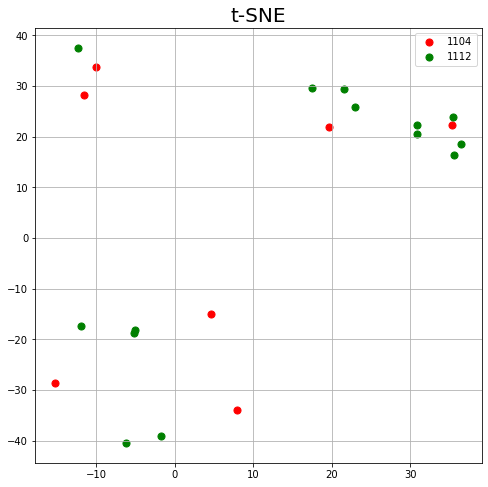

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_title('t-SNE', fontsize = 20)

targets = list(df_team_stat['TeamID'].unique())####################################################################
colors = ['r', 'g']#####################################################################################
    
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['TeamID'] == target
    ax.scatter(tsne_df2.loc[indicesToKeep, 0],
               tsne_df2.loc[indicesToKeep, 1],
               c = color,
               s = 50)
    
ax.legend(targets)
ax.grid()

3D

In [ ]:
tsne = TSNE(n_components=3, n_iter=1000)
tsne_points = tsne.fit_transform(X)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
tsne_df = pd.DataFrame(data = tsne_points)


In [ ]:
tsne_df

,0,1,2
0,7.224979,1.663879,13.708306
1,-15.286977,1.892120,-1.939086
2,3.756994,-9.040071,-15.622939
3,-10.537261,2.570982,-13.003627
4,7.016017,5.773435,8.362469
...,...,...,...
1194,2.695841,0.257726,8.587213
1195,2.565188,-0.375819,-11.597861
1196,8.539575,1.967236,15.914312
1197,-0.258907,-5.815722,10.904406


In [ ]:
tsne_df2 = pd.concat([tsne_df, df_team_stat[['TeamID']]], axis = 1)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


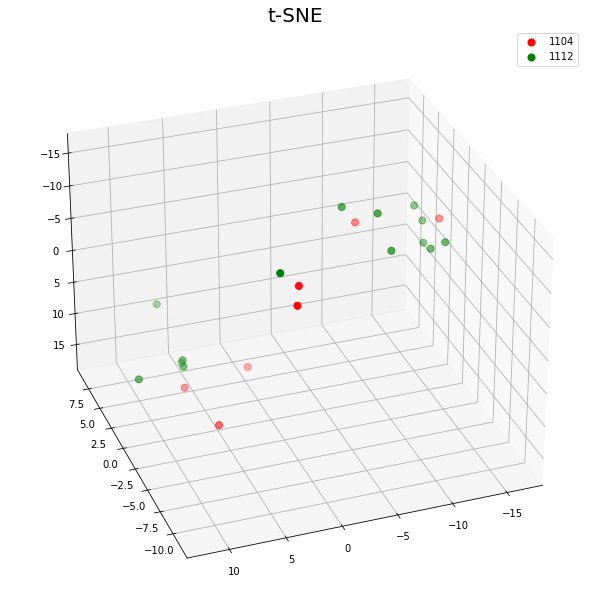

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig, elev=-150, azim=110)
ax.set_title('t-SNE', fontsize = 20)

targets = list(df_team_stat['TeamID'].unique())####################################################################
colors = ['r', 'g']########################################################################################################################################
    
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['TeamID'] == target
    ax.scatter(tsne_df2.loc[indicesToKeep, 0],
               tsne_df2.loc[indicesToKeep, 1],
               tsne_df2.loc[indicesToKeep, 2],
               c = color,
               s = 50)
    
ax.legend(targets)
ax.grid()

# III. 변수가공(Features Engineering)

<h2>1. 훈련데이터</h2>

In [ ]:
df = df_tourney_results.copy()

In [ ]:
df = df[df['Season'] >= 2003].reset_index(drop=True)

In [ ]:
df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore
0,2003,134,1421,92,1411,84
1,2003,136,1112,80,1436,51
2,2003,136,1113,84,1272,71
3,2003,136,1141,79,1166,73
4,2003,136,1143,76,1301,74


<h3>Seeds</h3>


In [ ]:
#컬럼명 조회
print(df.columns, '/n')
print(df_seeds.columns)

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore'], dtype='object') /n
Index(['Season', 'Seed', 'TeamID'], dtype='object')


In [ ]:
df = pd.merge(
    df, 
    df_seeds, 
    how='left', 
    left_on=['Season', 'WTeamID'], 
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'Seed': 'SeedW'})

In [ ]:
df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,SeedW
0,2003,134,1421,92,1411,84,X16b
1,2003,136,1112,80,1436,51,Z01
2,2003,136,1113,84,1272,71,Z10
3,2003,136,1141,79,1166,73,Z11
4,2003,136,1143,76,1301,74,W08


In [ ]:
df = pd.merge(
    df, 
    df_seeds, 
    how='left', 
    left_on=['Season', 'LTeamID'], 
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'Seed': 'SeedL'})

In [ ]:
df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,SeedW,SeedL
0,2003,134,1421,92,1411,84,X16b,X16a
1,2003,136,1112,80,1436,51,Z01,Z16
2,2003,136,1113,84,1272,71,Z10,Z07
3,2003,136,1141,79,1166,73,Z11,Z06
4,2003,136,1143,76,1301,74,W08,W09


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1181 entries, 0 to 1180
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   1181 non-null   int64 
 1   DayNum   1181 non-null   int64 
 2   WTeamID  1181 non-null   int64 
 3   WScore   1181 non-null   int64 
 4   LTeamID  1181 non-null   int64 
 5   LScore   1181 non-null   int64 
 6   SeedW    1181 non-null   object
 7   SeedL    1181 non-null   object
dtypes: int64(6), object(2)
memory usage: 83.0+ KB


In [ ]:
#SeedW, SeedL의 문자제거
def treat_seed(seed):
    return int(re.sub("[^0-9]", "", seed))

In [ ]:
df['SeedW'] = df['SeedW'].apply(treat_seed)
df['SeedL'] = df['SeedL'].apply(treat_seed)

In [ ]:
df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,SeedW,SeedL
0,2003,134,1421,92,1411,84,16,16
1,2003,136,1112,80,1436,51,1,16
2,2003,136,1113,84,1272,71,10,7
3,2003,136,1141,79,1166,73,11,6
4,2003,136,1143,76,1301,74,8,9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1181 entries, 0 to 1180
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Season   1181 non-null   int64
 1   DayNum   1181 non-null   int64
 2   WTeamID  1181 non-null   int64
 3   WScore   1181 non-null   int64
 4   LTeamID  1181 non-null   int64
 5   LScore   1181 non-null   int64
 6   SeedW    1181 non-null   int64
 7   SeedL    1181 non-null   int64
dtypes: int64(8)
memory usage: 83.0 KB


 <h3>Season Stats</h3>

* <span style="font-weight: bold"> WinRatioW: the win ratio of the winning team during the season</span><br>
* <span style="font-weight: bold"> WinRatioL: the win ratio of the losing team during the season</span><br>

In [ ]:
#컬럼명 조회
print(df.columns, '/n')
print(df_features_season.columns)

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'SeedW',
       'SeedL'],
      dtype='object') /n
Index(['Season', 'TeamID', 'WinRatio', 'GapAvg'], dtype='object')


In [ ]:
df = pd.merge(
    df,
    df_features_season,
    how='left',
    left_on=['Season', 'WTeamID'],
    right_on=['Season', 'TeamID']
).rename(columns={
    'WinRatio': 'WinRatioW',
    'GapAvg': 'GapAvgW',
}).drop(columns='TeamID', axis=1)

In [ ]:
df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,SeedW,SeedL,WinRatioW,GapAvgW
0,2003,134,1421,92,1411,84,16,16,0.448276,-7.241379
1,2003,136,1112,80,1436,51,1,16,0.892857,14.964286
2,2003,136,1113,84,1272,71,10,7,0.620690,6.793103
3,2003,136,1141,79,1166,73,11,6,0.793103,6.103448
4,2003,136,1143,76,1301,74,8,9,0.724138,4.724138


In [ ]:
df = pd.merge(
    df,
    df_features_season,
    how='left',
    left_on=['Season', 'LTeamID'],
    right_on=['Season', 'TeamID']
).rename(columns={
    'WinRatio': 'WinRatioL',
    'GapAvg': 'GapAvgL',
}).drop(columns='TeamID', axis=1)

In [ ]:
df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,SeedW,SeedL,WinRatioW,GapAvgW,WinRatioL,GapAvgL
0,2003,134,1421,92,1411,84,16,16,0.448276,-7.241379,0.600000,1.966667
1,2003,136,1112,80,1436,51,1,16,0.892857,14.964286,0.655172,4.655172
2,2003,136,1113,84,1272,71,10,7,0.620690,6.793103,0.793103,8.689655
3,2003,136,1141,79,1166,73,11,6,0.793103,6.103448,0.878788,14.909091
4,2003,136,1143,76,1301,74,8,9,0.724138,4.724138,0.600000,4.400000


<h3>Add symetrical</h3>

* Right now our data only consists of won matches
* We duplicate our data, get rid of the winner loser



In [ ]:
def add_loosing_matches(win_df):
    win_rename = {
        "WTeamID": "TeamIdA", 
        "WScore" : "ScoreA", 
        "LTeamID" : "TeamIdB",
        "LScore": "ScoreB",
        "SeedW": "SeedA", 
        "SeedL": "SeedB",
        'WinRatioW' : 'WinRatioA',
        'WinRatioL' : 'WinRatioB',
        'GapAvgW' : 'GapAvgA',
        'GapAvgL' : 'GapAvgB',
     }
    
    lose_rename = {
        "WTeamID": "TeamIdB", 
        "WScore" : "ScoreB", 
        "LTeamID" : "TeamIdA",
        "LScore": "ScoreA",
        "SeedW": "SeedB", 
        "SeedL": "SeedA",
        'GapAvgW' : 'GapAvgB',
        'GapAvgL' : 'GapAvgA',
        'WinRatioW' : 'WinRatioB',
        'WinRatioL' : 'WinRatioA',
    }
    
    win_df = win_df.copy()
    lose_df = win_df.copy()
    
    win_df = win_df.rename(columns=win_rename)
    lose_df = lose_df.rename(columns=lose_rename)
    
    return pd.concat([win_df, lose_df], 0, sort=False)

In [ ]:
df = add_loosing_matches(df)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:34: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only


In [ ]:
df.head()

,Season,DayNum,TeamIdA,ScoreA,TeamIdB,ScoreB,SeedA,SeedB,WinRatioA,GapAvgA,WinRatioB,GapAvgB
0,2003,134,1421,92,1411,84,16,16,0.448276,-7.241379,0.600000,1.966667
1,2003,136,1112,80,1436,51,1,16,0.892857,14.964286,0.655172,4.655172
2,2003,136,1113,84,1272,71,10,7,0.620690,6.793103,0.793103,8.689655
3,2003,136,1141,79,1166,73,11,6,0.793103,6.103448,0.878788,14.909091
4,2003,136,1143,76,1301,74,8,9,0.724138,4.724138,0.600000,4.400000


<h3>Differences</h3>

* SeedDiff 
* WinRatioDiff
* GapAvgDiff

In [ ]:
df['SeedDiff'] = df['SeedA'] - df['SeedB']
df['WinRatioDiff'] = df['WinRatioA'] - df['WinRatioB']
df['GapAvgDiff'] = df['GapAvgA'] - df['GapAvgB']

In [ ]:
df.head()

,Season,DayNum,TeamIdA,ScoreA,TeamIdB,ScoreB,SeedA,SeedB,WinRatioA,GapAvgA,WinRatioB,GapAvgB,SeedDiff,WinRatioDiff,GapAvgDiff
0,2003,134,1421,92,1411,84,16,16,0.448276,-7.241379,0.600000,1.966667,0,-0.151724,-9.208046
1,2003,136,1112,80,1436,51,1,16,0.892857,14.964286,0.655172,4.655172,-15,0.237685,10.309113
2,2003,136,1113,84,1272,71,10,7,0.620690,6.793103,0.793103,8.689655,3,-0.172414,-1.896552
3,2003,136,1141,79,1166,73,11,6,0.793103,6.103448,0.878788,14.909091,5,-0.085684,-8.805643
4,2003,136,1143,76,1301,74,8,9,0.724138,4.724138,0.600000,4.400000,-1,0.124138,0.324138


In [ ]:
df.isna().sum()

Season          0
DayNum          0
TeamIdA         0
ScoreA          0
TeamIdB         0
ScoreB          0
SeedA           0
SeedB           0
WinRatioA       0
GapAvgA         0
WinRatioB       0
GapAvgB         0
SeedDiff        0
WinRatioDiff    0
GapAvgDiff      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2362 entries, 0 to 1180
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Season        2362 non-null   int64  
 1   DayNum        2362 non-null   int64  
 2   TeamIdA       2362 non-null   int64  
 3   ScoreA        2362 non-null   int64  
 4   TeamIdB       2362 non-null   int64  
 5   ScoreB        2362 non-null   int64  
 6   SeedA         2362 non-null   int64  
 7   SeedB         2362 non-null   int64  
 8   WinRatioA     2362 non-null   float64
 9   GapAvgA       2362 non-null   float64
 10  WinRatioB     2362 non-null   float64
 11  GapAvgB       2362 non-null   float64
 12  SeedDiff      2362 non-null   int64  
 13  WinRatioDiff  2362 non-null   float64
 14  GapAvgDiff    2362 non-null   float64
dtypes: float64(6), int64(9)
memory usage: 295.2 KB


<h2>2. 테스트 데이터</h2> 

In [ ]:
df_test = pd.read_csv(DATA_PATH_stage1 + "MSampleSubmissionStage1.csv")

In [ ]:
df_test

,ID,Pred
0,2016_1112_1114,0.5
1,2016_1112_1122,0.5
2,2016_1112_1124,0.5
3,2016_1112_1138,0.5
4,2016_1112_1139,0.5
...,...,...
11385,2021_1452_1457,0.5
11386,2021_1452_1458,0.5
11387,2021_1455_1457,0.5
11388,2021_1455_1458,0.5


In [ ]:
df_test['Season'] = df_test['ID'].apply(lambda x: int(x.split('_')[0]))
df_test['TeamIdA'] = df_test['ID'].apply(lambda x: int(x.split('_')[1]))
df_test['TeamIdB'] = df_test['ID'].apply(lambda x: int(x.split('_')[2]))

In [ ]:
df_test

,ID,Pred,Season,TeamIdA,TeamIdB
0,2016_1112_1114,0.5,2016,1112,1114
1,2016_1112_1122,0.5,2016,1112,1122
2,2016_1112_1124,0.5,2016,1112,1124
3,2016_1112_1138,0.5,2016,1112,1138
4,2016_1112_1139,0.5,2016,1112,1139
...,...,...,...,...,...
11385,2021_1452_1457,0.5,2021,1452,1457
11386,2021_1452_1458,0.5,2021,1452,1458
11387,2021_1455_1457,0.5,2021,1455,1457
11388,2021_1455_1458,0.5,2021,1455,1458


<h3> Seeds</h3><br>

In [ ]:
#컬럼명 조회
print(df_test.columns, '/n')
print(df_seeds.columns)

Index(['ID', 'Pred', 'Season', 'TeamIdA', 'TeamIdB'], dtype='object') /n
Index(['Season', 'Seed', 'TeamID'], dtype='object')


In [ ]:
df_test = pd.merge(
    df_test,
    df_seeds,
    how='left',
    left_on=['Season', 'TeamIdA'],
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'Seed': 'SeedA'})

In [ ]:
df_test.head()

,ID,Pred,Season,TeamIdA,TeamIdB,SeedA
0,2016_1112_1114,0.5,2016,1112,1114,Y06
1,2016_1112_1122,0.5,2016,1112,1122,Y06
2,2016_1112_1124,0.5,2016,1112,1124,Y06
3,2016_1112_1138,0.5,2016,1112,1138,Y06
4,2016_1112_1139,0.5,2016,1112,1139,Y06


In [ ]:
df_test = pd.merge(
    df_test, 
    df_seeds, 
    how='left', 
    left_on=['Season', 'TeamIdB'], 
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'Seed': 'SeedB'})

In [ ]:
df_test.head()

,ID,Pred,Season,TeamIdA,TeamIdB,SeedA,SeedB
0,2016_1112_1114,0.5,2016,1112,1114,Y06,X12
1,2016_1112_1122,0.5,2016,1112,1122,Y06,Y16
2,2016_1112_1124,0.5,2016,1112,1124,Y06,Z05
3,2016_1112_1138,0.5,2016,1112,1138,Y06,Y14
4,2016_1112_1139,0.5,2016,1112,1139,Y06,X09


In [ ]:
df_test.isna().sum()

ID         0
Pred       0
Season     0
TeamIdA    0
TeamIdB    0
SeedA      0
SeedB      0
dtype: int64

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11390 entries, 0 to 11389
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       11390 non-null  object 
 1   Pred     11390 non-null  float64
 2   Season   11390 non-null  int64  
 3   TeamIdA  11390 non-null  int64  
 4   TeamIdB  11390 non-null  int64  
 5   SeedA    11390 non-null  object 
 6   SeedB    11390 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 711.9+ KB


In [ ]:
#SeedA, SeedB 문자제거
df_test['SeedA'] = df_test['SeedA'].apply(treat_seed)
df_test['SeedB'] = df_test['SeedB'].apply(treat_seed)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11390 entries, 0 to 11389
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       11390 non-null  object 
 1   Pred     11390 non-null  float64
 2   Season   11390 non-null  int64  
 3   TeamIdA  11390 non-null  int64  
 4   TeamIdB  11390 non-null  int64  
 5   SeedA    11390 non-null  int64  
 6   SeedB    11390 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 711.9+ KB


<h3> Season Stats</h3><br>

In [ ]:
#컬럼명 조회
print(df_test.columns, '/n')
print(df_features_season.columns)

Index(['ID', 'Pred', 'Season', 'TeamIdA', 'TeamIdB', 'SeedA', 'SeedB'], dtype='object') /n
Index(['Season', 'TeamID', 'WinRatio', 'GapAvg'], dtype='object')


In [ ]:
df_test = pd.merge(
    df_test,
    df_features_season,
    how='left',
    left_on=['Season', 'TeamIdA'],
    right_on=['Season', 'TeamID']
).rename(columns={
    'WinRatio': 'WinRatioA',
    'GapAvg': 'GapAvgA',
}).drop(columns='TeamID', axis=1)

In [ ]:
df_test.head()

,ID,Pred,Season,TeamIdA,TeamIdB,SeedA,SeedB,WinRatioA,GapAvgA
0,2016_1112_1114,0.5,2016,1112,1114,6,12,0.757576,12.212121
1,2016_1112_1122,0.5,2016,1112,1122,6,16,0.757576,12.212121
2,2016_1112_1124,0.5,2016,1112,1124,6,5,0.757576,12.212121
3,2016_1112_1138,0.5,2016,1112,1138,6,14,0.757576,12.212121
4,2016_1112_1139,0.5,2016,1112,1139,6,9,0.757576,12.212121


In [ ]:
df_test = pd.merge(
    df_test,
    df_features_season,
    how='left',
    left_on=['Season', 'TeamIdB'],
    right_on=['Season', 'TeamID']
).rename(columns={
    'WinRatio': 'WinRatioB',
    'GapAvg': 'GapAvgB',
}).drop(columns='TeamID', axis=1)

In [ ]:
df_test.head()

,ID,Pred,Season,TeamIdA,TeamIdB,SeedA,SeedB,WinRatioA,GapAvgA,WinRatioB,GapAvgB
0,2016_1112_1114,0.5,2016,1112,1114,6,12,0.757576,12.212121,0.870968,9.935484
1,2016_1112_1122,0.5,2016,1112,1122,6,16,0.757576,12.212121,0.484848,-2.363636
2,2016_1112_1124,0.5,2016,1112,1124,6,5,0.757576,12.212121,0.656250,6.687500
3,2016_1112_1138,0.5,2016,1112,1138,6,14,0.757576,12.212121,0.575758,0.666667
4,2016_1112_1139,0.5,2016,1112,1139,6,9,0.757576,12.212121,0.677419,9.419355


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11390 entries, 0 to 11389
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         11390 non-null  object 
 1   Pred       11390 non-null  float64
 2   Season     11390 non-null  int64  
 3   TeamIdA    11390 non-null  int64  
 4   TeamIdB    11390 non-null  int64  
 5   SeedA      11390 non-null  int64  
 6   SeedB      11390 non-null  int64  
 7   WinRatioA  11390 non-null  float64
 8   GapAvgA    11390 non-null  float64
 9   WinRatioB  11390 non-null  float64
 10  GapAvgB    11390 non-null  float64
dtypes: float64(5), int64(5), object(1)
memory usage: 1.0+ MB


In [ ]:
df_test.isna().sum()

ID           0
Pred         0
Season       0
TeamIdA      0
TeamIdB      0
SeedA        0
SeedB        0
WinRatioA    0
GapAvgA      0
WinRatioB    0
GapAvgB      0
dtype: int64

<h3> Differences</h3><br>

In [ ]:
df_test['SeedDiff'] = df_test['SeedA'] - df_test['SeedB']
df_test['WinRatioDiff'] = df_test['WinRatioA'] - df_test['WinRatioB']
df_test['GapAvgDiff'] = df_test['GapAvgA'] - df_test['GapAvgB']

In [ ]:
df_test.head()

,ID,Pred,Season,TeamIdA,TeamIdB,SeedA,SeedB,WinRatioA,GapAvgA,WinRatioB,GapAvgB,SeedDiff,WinRatioDiff,GapAvgDiff
0,2016_1112_1114,0.5,2016,1112,1114,6,12,0.757576,12.212121,0.870968,9.935484,-6,-0.113392,2.276637
1,2016_1112_1122,0.5,2016,1112,1122,6,16,0.757576,12.212121,0.484848,-2.363636,-10,0.272727,14.575758
2,2016_1112_1124,0.5,2016,1112,1124,6,5,0.757576,12.212121,0.656250,6.687500,1,0.101326,5.524621
3,2016_1112_1138,0.5,2016,1112,1138,6,14,0.757576,12.212121,0.575758,0.666667,-8,0.181818,11.545455
4,2016_1112_1139,0.5,2016,1112,1139,6,9,0.757576,12.212121,0.677419,9.419355,-3,0.080156,2.792766


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11390 entries, 0 to 11389
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            11390 non-null  object 
 1   Pred          11390 non-null  float64
 2   Season        11390 non-null  int64  
 3   TeamIdA       11390 non-null  int64  
 4   TeamIdB       11390 non-null  int64  
 5   SeedA         11390 non-null  int64  
 6   SeedB         11390 non-null  int64  
 7   WinRatioA     11390 non-null  float64
 8   GapAvgA       11390 non-null  float64
 9   WinRatioB     11390 non-null  float64
 10  GapAvgB       11390 non-null  float64
 11  SeedDiff      11390 non-null  int64  
 12  WinRatioDiff  11390 non-null  float64
 13  GapAvgDiff    11390 non-null  float64
dtypes: float64(7), int64(6), object(1)
memory usage: 1.3+ MB


In [ ]:
df_test.isna().sum()

ID              0
Pred            0
Season          0
TeamIdA         0
TeamIdB         0
SeedA           0
SeedB           0
WinRatioA       0
GapAvgA         0
WinRatioB       0
GapAvgB         0
SeedDiff        0
WinRatioDiff    0
GapAvgDiff      0
dtype: int64

<h2>3. 출력변수 </h2> 

In [ ]:
df['ScoreDiff'] = df['ScoreA'] - df['ScoreB']
df['WinA'] = (df['ScoreDiff'] > 0).astype(int)

In [ ]:
df

,Season,DayNum,TeamIdA,ScoreA,TeamIdB,ScoreB,SeedA,SeedB,WinRatioA,GapAvgA,WinRatioB,GapAvgB,SeedDiff,WinRatioDiff,GapAvgDiff,ScoreDiff,WinA
0,2003,134,1421,92,1411,84,16,16,0.448276,-7.241379,0.600000,1.966667,0,-0.151724,-9.208046,8,1
1,2003,136,1112,80,1436,51,1,16,0.892857,14.964286,0.655172,4.655172,-15,0.237685,10.309113,29,1
2,2003,136,1113,84,1272,71,10,7,0.620690,6.793103,0.793103,8.689655,3,-0.172414,-1.896552,13,1
3,2003,136,1141,79,1166,73,11,6,0.793103,6.103448,0.878788,14.909091,5,-0.085684,-8.805643,6,1
4,2003,136,1143,76,1301,74,8,9,0.724138,4.724138,0.600000,4.400000,-1,0.124138,0.324138,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,2021,148,1425,66,1211,85,6,1,0.758621,9.655172,1.000000,23.000000,5,-0.241379,-13.344828,-19,0
1177,2021,148,1276,49,1417,51,1,11,0.833333,10.875000,0.653846,4.346154,-10,0.179487,6.528846,-2,0
1178,2021,152,1222,59,1124,78,2,1,0.884615,18.000000,0.916667,17.958333,1,-0.032051,0.041667,-19,0
1179,2021,152,1417,90,1211,93,11,1,0.653846,4.346154,1.000000,23.000000,10,-0.346154,-18.653846,-3,0


<AxesSubplot:>

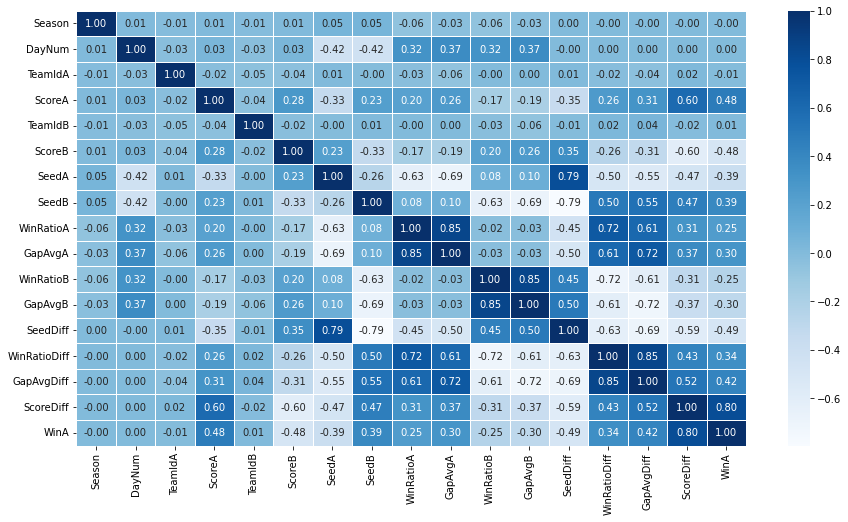

In [ ]:
import seaborn as sns
plt.figure(figsize = (15,8)) # 그래프 크기 설정
sns.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [ ]:
# # SeedDiff 에 따른 WinA의 박스플롯
# plt.figure(figsize=(14, 6))
# sns.boxenplot(x='SeedDiff', y='WinA', data=df)
# plt.show()

In [ ]:
# # GapAvgDiff에 따른 WinA의 regplot(scatter + line)
# plt.figure(figsize=(14, 6))
# sns.regplot(x='GapAvgDiff', y='WinA', data=df)
# plt.show()

In [ ]:
df.shape

(2362, 17)

In [ ]:
df_test

,ID,Pred,Season,TeamIdA,TeamIdB,SeedA,SeedB,WinRatioA,GapAvgA,WinRatioB,GapAvgB,SeedDiff,WinRatioDiff,GapAvgDiff
0,2016_1112_1114,0.5,2016,1112,1114,6,12,0.757576,12.212121,0.870968,9.935484,-6,-0.113392,2.276637
1,2016_1112_1122,0.5,2016,1112,1122,6,16,0.757576,12.212121,0.484848,-2.363636,-10,0.272727,14.575758
2,2016_1112_1124,0.5,2016,1112,1124,6,5,0.757576,12.212121,0.656250,6.687500,1,0.101326,5.524621
3,2016_1112_1138,0.5,2016,1112,1138,6,14,0.757576,12.212121,0.575758,0.666667,-8,0.181818,11.545455
4,2016_1112_1139,0.5,2016,1112,1139,6,9,0.757576,12.212121,0.677419,9.419355,-3,0.080156,2.792766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11385,2021_1452_1457,0.5,2021,1452,1457,3,12,0.666667,5.185185,0.958333,12.750000,-9,-0.291667,-7.564815
11386,2021_1452_1458,0.5,2021,1452,1458,3,9,0.666667,5.185185,0.586207,5.310345,-6,0.080460,-0.125160
11387,2021_1455_1457,0.5,2021,1455,1457,11,12,0.736842,2.631579,0.958333,12.750000,-1,-0.221491,-10.118421
11388,2021_1455_1458,0.5,2021,1455,1458,11,9,0.736842,2.631579,0.586207,5.310345,2,0.150635,-2.678766


In [ ]:
df_test.shape

(11390, 14)

# IV. 모델링

In [ ]:
features = [
    'SeedA',
    'SeedB',
    'WinRatioA',
    'GapAvgA',
    'WinRatioB',
    'GapAvgB',
    'SeedDiff',
    'WinRatioDiff',
    'GapAvgDiff'
]

In [ ]:
features

['SeedA',
 'SeedB',
 'WinRatioA',
 'GapAvgA',
 'WinRatioB',
 'GapAvgB',
 'SeedDiff',
 'WinRatioDiff',
 'GapAvgDiff']

In [ ]:
def rescale(features, df_train, df_val, df_test=None):
    min_ = df_train[features].min()
    max_ = df_train[features].max()
    
    df_train[features] = (df_train[features] - min_) / (max_ - min_)
    df_val[features] = (df_val[features] - min_) / (max_ - min_)
    
    if df_test is not None:
        df_test[features] = (df_test[features] - min_) / (max_ - min_)
        
    return df_train, df_val, df_test

**K-fold Cross Validation**



In [ ]:
from collections import Counter
from sklearn.metrics import *
from sklearn.linear_model import *
from sklearn.model_selection import *

In [ ]:
def kfold_reg(df, df_test_=None, plot=False, verbose=0, mode="reg"):
    seasons = df['Season'].unique()
    cvs = []
    pred_tests = []
    target = "ScoreDiff" if mode == "reg" else "WinA"
    
    for season in seasons[10:]:
        if verbose:
            print(f'\nValidating on season {season}')
        
        df_train = df[df['Season'] < season].reset_index(drop=True).copy()
        df_val = df[df['Season'] == season].reset_index(drop=True).copy()
        df_test = df_test_.copy()
        
        df_train, df_val, df_test = rescale(features, df_train, df_val, df_test)
        
        if mode == "reg":
            model = ElasticNet(alpha=1, l1_ratio=0.5)
        else:
            model = LogisticRegression(C=10)
            
        model.fit(df_train[features], df_train[target])
        
        if mode == "reg":
            pred = model.predict(df_val[features])
            pred = (pred - pred.min()) / (pred.max() - pred.min())
        else:
            pred = model.predict_proba(df_val[features])[:, 1]
        
        if df_test is not None:
            if mode == "reg":
                pred_test = model.predict(df_test[features])
                pred_test = (pred_test - pred_test.min()) / (pred_test.max() - pred_test.min())
            else:
                pred_test = model.predict_proba(df_test[features])[:, 1]
                
            pred_tests.append(pred_test)
            
        if plot:
            plt.figure(figsize=(15, 6))
            plt.subplot(1, 2, 1)
            plt.scatter(pred, df_val['ScoreDiff'].values, s=5)
            plt.grid(True)
            plt.subplot(1, 2, 2)
            sns.histplot(pred)
            plt.show()
        
        loss = log_loss(df_val['WinA'].values, pred)
        cvs.append(loss)

        if verbose:
            print(f'\t -> Scored {loss:.3f}')
        
    print(f'\n Local CV is {np.mean(cvs):.3f}')
    
    return pred_tests

In [ ]:
pred_tests = kfold_reg(df, df_test, plot=False, verbose=1, mode="cls")


Validating on season 2013
	 -> Scored 0.616

Validating on season 2014
	 -> Scored 0.613

Validating on season 2015
	 -> Scored 0.503

Validating on season 2016
	 -> Scored 0.570

Validating on season 2017
	 -> Scored 0.529

Validating on season 2018
	 -> Scored 0.623

Validating on season 2019
	 -> Scored 0.508

Validating on season 2021
	 -> Scored 0.631

 Local CV is 0.574


# V. 제출

**Sample Submission**

In [ ]:
sample_submission = pd.read_csv(DATA_PATH_stage1 + "MSampleSubmissionStage1.csv")

In [ ]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11390 entries, 0 to 11389
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      11390 non-null  object 
 1   Pred    11390 non-null  float64
dtypes: float64(1), object(1)
memory usage: 178.1+ KB


In [ ]:
sample_submission.shape

(11390, 2)

In [ ]:
sample_submission.head()

,ID,Pred
0,2016_1112_1114,0.5
1,2016_1112_1122,0.5
2,2016_1112_1124,0.5
3,2016_1112_1138,0.5
4,2016_1112_1139,0.5


In [ ]:
pred_test = np.mean(pred_tests, 0)

In [ ]:
pred_test

array([0.76310072, 0.92252019, 0.57827182, ..., 0.3452428 , 0.32367486,
       0.47574768])

In [ ]:
len(pred_test)

11390

In [ ]:
df_test.shape

(11390, 14)

In [ ]:
sub = df_test[['ID', 'Pred']].copy()
sub['Pred'] = pred_test
sub.to_csv('submission.csv', index=False)

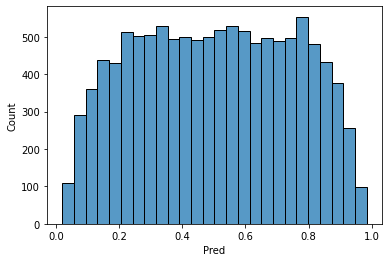

In [ ]:
_ = sns.histplot(sub['Pred'])

In [ ]:
sub.head()

,ID,Pred
0,2016_1112_1114,0.763101
1,2016_1112_1122,0.922520
2,2016_1112_1124,0.578272
3,2016_1112_1138,0.882602
4,2016_1112_1139,0.641170


# **************************STAGE2(2022년 결과 예측)

In [ ]:
#seeds
df_seeds2 = pd.read_csv(DATA_PATH_stage2 + "MNCAATourneySeeds.csv")
df_seeds2.head()

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [ ]:
df_seeds2['Season'].unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2021, 2022])

In [ ]:
df_seeds2.isna().sum()

Season    0
Seed      0
TeamID    0
dtype: int64

In [ ]:
df_season_results2 = pd.read_csv(DATA_PATH_stage2 + "MRegularSeasonCompactResults.csv")
df_season_results2.drop(['NumOT', 'WLoc'], axis=1, inplace=True)
df_season_results2.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore
0,1985,20,1228,81,1328,64
1,1985,25,1106,77,1354,70
2,1985,25,1112,63,1223,56
3,1985,25,1165,70,1432,54
4,1985,25,1192,86,1447,74


In [ ]:
df_season_results2['ScoreGap'] = df_season_results2['WScore'] - df_season_results2['LScore']


In [ ]:
#'WinNums': Number of wins 
num_win2 = df_season_results2.groupby(['Season', 'WTeamID']).count()
num_win2 = num_win2.reset_index()[['Season', 'WTeamID', 'DayNum']].rename(columns={"DayNum": "NumWins", "WTeamID": "TeamID"})

In [ ]:
#'NumLosses': Number of losses 
num_loss2 = df_season_results2.groupby(['Season', 'LTeamID']).count()
num_loss2 = num_loss2.reset_index()[['Season', 'LTeamID', 'DayNum']].rename(columns={"DayNum": "NumLosses", "LTeamID": "TeamID"})

In [ ]:
#'GapWins': Average score gap of wins 
gap_win2 = df_season_results2.groupby(['Season', 'WTeamID']).mean().reset_index()
gap_win2 = gap_win2[['Season', 'WTeamID', 'ScoreGap']].rename(columns={"ScoreGap": "GapWins", "WTeamID": "TeamID"})

In [ ]:
#'GapLosses': Average score gap of losses 
gap_loss2 = df_season_results2.groupby(['Season', 'LTeamID']).mean().reset_index()
gap_loss2 = gap_loss2[['Season', 'LTeamID', 'ScoreGap']].rename(columns={"ScoreGap": "GapLosses", "LTeamID": "TeamID"})


In [ ]:
df_features_season_w2 = df_season_results2.groupby(['Season', 'WTeamID']).count().reset_index()[['Season', 'WTeamID']].rename(columns={"WTeamID": "TeamID"})
df_features_season_l2 = df_season_results2.groupby(['Season', 'LTeamID']).count().reset_index()[['Season', 'LTeamID']].rename(columns={"LTeamID": "TeamID"})


In [ ]:
df_features_season2 = pd.concat([df_features_season_w2, df_features_season_l2], 0).drop_duplicates().sort_values(['Season', 'TeamID']).reset_index(drop=True)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
df_features_season2 = df_features_season2.merge(num_win, on=['Season', 'TeamID'], how='left')
df_features_season2 = df_features_season2.merge(num_loss, on=['Season', 'TeamID'], how='left')
df_features_season2 = df_features_season2.merge(gap_win, on=['Season', 'TeamID'], how='left')
df_features_season2 = df_features_season2.merge(gap_loss, on=['Season', 'TeamID'], how='left')

In [ ]:
df_features_season2.fillna(0, inplace=True)  

In [ ]:
#'WinRatio' = NumWins / (NumWins + NumLosses)
df_features_season2['WinRatio'] = df_features_season2['NumWins'] / (df_features_season2['NumWins'] + df_features_season2['NumLosses'])

In [ ]:
#'GapAvg' = (NumWins * GapWins - NumLosses * GapLosses) / (NumWins + NumLosses)
df_features_season2['GapAvg'] = (
    (df_features_season2['NumWins'] * df_features_season2['GapWins'] - 
    df_features_season2['NumLosses'] * df_features_season2['GapLosses'])
    / (df_features_season2['NumWins'] + df_features_season2['NumLosses'])
)

In [ ]:
#WinRatio & GapAvg만 남기기
df_features_season2.drop(['NumWins', 'NumLosses', 'GapWins', 'GapLosses'], axis=1, inplace=True)

In [ ]:
#Tourney_results
#data load
df_tourney_results2 = pd.read_csv(DATA_PATH_stage2 + "MNCAATourneyCompactResults.csv")
df_tourney_results2.drop(['NumOT', 'WLoc'], axis=1, inplace=True)

In [ ]:
#1.train data
df2 = df_tourney_results2.copy()

In [ ]:
df2 = df2[df2['Season'] >= 2003].reset_index(drop=True)

In [ ]:
#seeds


df2 = pd.merge(
    df2, 
    df_seeds2, 
    how='left', 
    left_on=['Season', 'WTeamID'], 
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'Seed': 'SeedW'})

In [ ]:
df2 = pd.merge(
    df2, 
    df_seeds2, 
    how='left', 
    left_on=['Season', 'LTeamID'], 
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'Seed': 'SeedL'})

In [ ]:
#SeedW, SeedL의 문자제거
def treat_seed(seed):
    return int(re.sub("[^0-9]", "", seed))

In [ ]:
df2['SeedW'] = df2['SeedW'].apply(treat_seed)
df2['SeedL'] = df2['SeedL'].apply(treat_seed)

In [ ]:
#Season stats


df2 = pd.merge(
    df2,
    df_features_season2,
    how='left',
    left_on=['Season', 'WTeamID'],
    right_on=['Season', 'TeamID']
).rename(columns={
    'WinRatio': 'WinRatioW',
    'GapAvg': 'GapAvgW',
}).drop(columns='TeamID', axis=1)

In [ ]:
df2 = pd.merge(
    df2,
    df_features_season2,
    how='left',
    left_on=['Season', 'LTeamID'],
    right_on=['Season', 'TeamID']
).rename(columns={
    'WinRatio': 'WinRatioL',
    'GapAvg': 'GapAvgL',
}).drop(columns='TeamID', axis=1)

In [ ]:
def add_loosing_matches(win_df):
    win_rename = {
        "WTeamID": "TeamIdA", 
        "WScore" : "ScoreA", 
        "LTeamID" : "TeamIdB",
        "LScore": "ScoreB",
        "SeedW": "SeedA", 
        "SeedL": "SeedB",
        'WinRatioW' : 'WinRatioA',
        'WinRatioL' : 'WinRatioB',
        'GapAvgW' : 'GapAvgA',
        'GapAvgL' : 'GapAvgB',
     }
    
    lose_rename = {
        "WTeamID": "TeamIdB", 
        "WScore" : "ScoreB", 
        "LTeamID" : "TeamIdA",
        "LScore": "ScoreA",
        "SeedW": "SeedB", 
        "SeedL": "SeedA",
        'GapAvgW' : 'GapAvgB',
        'GapAvgL' : 'GapAvgA',
        'WinRatioW' : 'WinRatioB',
        'WinRatioL' : 'WinRatioA',
    }
    
    win_df = win_df.copy()
    lose_df = win_df.copy()
    
    win_df = win_df.rename(columns=win_rename)
    lose_df = lose_df.rename(columns=lose_rename)
    
    return pd.concat([win_df, lose_df], 0, sort=False)

In [ ]:
df2 = add_loosing_matches(df2)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:34: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only


In [ ]:
#Differences
df2['SeedDiff'] = df2['SeedA'] - df2['SeedB']
df2['WinRatioDiff'] = df2['WinRatioA'] - df2['WinRatioB']
df2['GapAvgDiff'] = df2['GapAvgA'] - df2['GapAvgB']


In [ ]:
df_test2 = pd.read_csv(DATA_PATH_stage2 + "MSampleSubmissionStage2.csv")

In [ ]:
df_test2['Season'] = df_test2['ID'].apply(lambda x: int(x.split('_')[0]))
df_test2['TeamIdA'] = df_test2['ID'].apply(lambda x: int(x.split('_')[1]))
df_test2['TeamIdB'] = df_test2['ID'].apply(lambda x: int(x.split('_')[2]))

In [ ]:
df_test2 = pd.merge(
    df_test2,
    df_seeds2,
    how='left',
    left_on=['Season', 'TeamIdA'],
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'Seed': 'SeedA'})

In [ ]:
df_test2 = pd.merge(
    df_test2, 
    df_seeds2, 
    how='left', 
    left_on=['Season', 'TeamIdB'], 
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'Seed': 'SeedB'})

In [ ]:
#SeedA, SeedB 문자제거
df_test2['SeedA'] = df_test2['SeedA'].apply(treat_seed)
df_test2['SeedB'] = df_test2['SeedB'].apply(treat_seed)

In [ ]:
df_test2 = pd.merge(
    df_test2,
    df_features_season2,
    how='left',
    left_on=['Season', 'TeamIdA'],
    right_on=['Season', 'TeamID']
).rename(columns={
    'WinRatio': 'WinRatioA',
    'GapAvg': 'GapAvgA',
}).drop(columns='TeamID', axis=1)

In [ ]:
df_test2 = pd.merge(
    df_test2,
    df_features_season2,
    how='left',
    left_on=['Season', 'TeamIdB'],
    right_on=['Season', 'TeamID']
).rename(columns={
    'WinRatio': 'WinRatioB',
    'GapAvg': 'GapAvgB',
}).drop(columns='TeamID', axis=1)

In [ ]:
df_test2['SeedDiff'] = df_test2['SeedA'] - df_test2['SeedB']
df_test2['WinRatioDiff'] = df_test2['WinRatioA'] - df_test2['WinRatioB']
df_test2['GapAvgDiff'] = df_test2['GapAvgA'] - df_test2['GapAvgB']

In [ ]:
#3.Target


df2['ScoreDiff'] = df2['ScoreA'] - df2['ScoreB']
df2['WinA'] = (df2['ScoreDiff'] > 0).astype(int)

In [ ]:
#Modeling

features = [
    'SeedA',
    'SeedB',
    'WinRatioA',
    'GapAvgA',
    'WinRatioB',
    'GapAvgB',
    'SeedDiff',
    'WinRatioDiff',
    'GapAvgDiff'
]

In [ ]:
def rescale(features, df_train, df_val, df_test=None):
    min_ = df_train[features].min()
    max_ = df_train[features].max()
    
    df_train[features] = (df_train[features] - min_) / (max_ - min_)
    df_val[features] = (df_val[features] - min_) / (max_ - min_)
    
    if df_test is not None:
        df_test[features] = (df_test[features] - min_) / (max_ - min_)
        
    return df_train, df_val, df_test

In [ ]:
def kfold_reg(df, df_test_=None, plot=False, verbose=0, mode="reg"):
    seasons = df2['Season'].unique()
    cvs2 = []
    pred_tests2 = []
    target2 = "ScoreDiff" if mode == "reg" else "WinA"
    
    for season in seasons[10:]:
        if verbose:
            print(f'\nValidating on season {season}')
        
        df_train = df2[df2['Season'] < season].reset_index(drop=True).copy()
        df_val = df2[df2['Season'] == season].reset_index(drop=True).copy()
        df_test = df_test_.copy()
        
        df_train, df_val, df_test = rescale(features, df_train, df_val, df_test)
        
        if mode == "reg":
            model = ElasticNet(alpha=1, l1_ratio=0.5)
        else:
            model = LogisticRegression(C=10)
            
        model.fit(df_train[features], df_train[target2])
        
        if mode == "reg":
            pred = model.predict(df_val[features])
            pred = (pred - pred.min()) / (pred.max() - pred.min())
        else:
            pred = model.predict_proba(df_val[features])[:, 1]
        
        if df_test is not None:
            if mode == "reg":
                pred_test2 = model.predict(df_test2[features])
                pred_test2 = (pred_test2 - pred_test2.min()) / (pred_test2.max() - pred_test2.min())
            else:
                pred_test2 = model.predict_proba(df_test2[features])[:, 1]
                
            pred_tests2.append(pred_test2)
            
        if plot:
            plt.figure(figsize=(15, 6))
            plt.subplot(1, 2, 1)
            plt.scatter(pred, df_val['ScoreDiff'].values, s=5)
            plt.grid(True)
            plt.subplot(1, 2, 2)
            sns.histplot(pred)
            plt.show()
        
        loss = log_loss(df_val['WinA'].values, pred)
        cvs2.append(loss)

        if verbose:
            print(f'\t -> Scored {loss:.3f}')
        
    print(f'\n Local CV is {np.mean(cvs2):.3f}')
    
    return pred_tests2

In [ ]:
pred_tests2 = kfold_reg(df, df_test, plot=False, verbose=1, mode="cls")


Validating on season 2013
	 -> Scored 0.616

Validating on season 2014
	 -> Scored 0.613

Validating on season 2015
	 -> Scored 0.503

Validating on season 2016
	 -> Scored 0.570

Validating on season 2017
	 -> Scored 0.529

Validating on season 2018
	 -> Scored 0.623

Validating on season 2019
	 -> Scored 0.508

Validating on season 2021
	 -> Scored 0.631

 Local CV is 0.574


In [ ]:
#submission 2

pred_test2 = np.mean(pred_tests2, 0)














In [ ]:
pred_test2

array([2.92632491e-10, 5.59964375e-39, 1.04514089e-21, ...,
       6.83651552e-15, 8.37244175e-01, 1.00000000e+00])

In [ ]:
len(pred_test2)

2278

In [ ]:
df_test2.shape

(2278, 14)

In [ ]:
sub2 = df_test2[['ID', 'Pred']].copy()
sub2['Pred'] = pred_test2
sub2.to_csv('submission2.csv', index=False)

# Jae young

In [ ]:
#from sklearn.model_selection import train_test_split  #이 competition에서는 데이터를 분할할 필요없음(stage1은 2016,2017,2018,2019,2021년 예측/ stage2에서는 2022년 예측으로 주어졌기때문)

In [ ]:
# train_test_split : 테스트 데이터 20%
#train_x, test_x, train_y, test_y = train_test_split(df.drop(['WinA'],axis=1), df['WinA'], test_size=0.20, random_state=42)

In [ ]:
# train_x
# test_x
# train_y
# test_y

In [ ]:
##분할 확인
# df.shape
# train_x.shape
# train_y.shape
# test_x.shape
# test_y.shape

In [ ]:
# train_y = df['WinA']
# train_x = df.drop(['WinA'],axis=1)
# test_y = df_test['WinA']
# test_x = df_test.drop(['WinA'],axis=1)

In [ ]:
# print(df.shape, df_test.shape)

In [ ]:
df.shape

(2362, 17)

In [ ]:
df

,Season,DayNum,TeamIdA,ScoreA,TeamIdB,ScoreB,SeedA,SeedB,WinRatioA,GapAvgA,WinRatioB,GapAvgB,SeedDiff,WinRatioDiff,GapAvgDiff,ScoreDiff,WinA
0,2003,134,1421,92,1411,84,16,16,0.448276,-7.241379,0.600000,1.966667,0,-0.151724,-9.208046,8,1
1,2003,136,1112,80,1436,51,1,16,0.892857,14.964286,0.655172,4.655172,-15,0.237685,10.309113,29,1
2,2003,136,1113,84,1272,71,10,7,0.620690,6.793103,0.793103,8.689655,3,-0.172414,-1.896552,13,1
3,2003,136,1141,79,1166,73,11,6,0.793103,6.103448,0.878788,14.909091,5,-0.085684,-8.805643,6,1
4,2003,136,1143,76,1301,74,8,9,0.724138,4.724138,0.600000,4.400000,-1,0.124138,0.324138,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,2021,148,1425,66,1211,85,6,1,0.758621,9.655172,1.000000,23.000000,5,-0.241379,-13.344828,-19,0
1177,2021,148,1276,49,1417,51,1,11,0.833333,10.875000,0.653846,4.346154,-10,0.179487,6.528846,-2,0
1178,2021,152,1222,59,1124,78,2,1,0.884615,18.000000,0.916667,17.958333,1,-0.032051,0.041667,-19,0
1179,2021,152,1417,90,1211,93,11,1,0.653846,4.346154,1.000000,23.000000,10,-0.346154,-18.653846,-3,0


In [ ]:
df_test.shape

(11390, 14)

In [ ]:
df.columns

Index(['Season', 'DayNum', 'TeamIdA', 'ScoreA', 'TeamIdB', 'ScoreB', 'SeedA',
       'SeedB', 'WinRatioA', 'GapAvgA', 'WinRatioB', 'GapAvgB', 'SeedDiff',
       'WinRatioDiff', 'GapAvgDiff', 'ScoreDiff', 'WinA'],
      dtype='object')

In [ ]:
df_test.columns

Index(['ID', 'Pred', 'Season', 'TeamIdA', 'TeamIdB', 'SeedA', 'SeedB',
       'WinRatioA', 'GapAvgA', 'WinRatioB', 'GapAvgB', 'SeedDiff',
       'WinRatioDiff', 'GapAvgDiff'],
      dtype='object')

<h3>Linear Regression</h3>

In [ ]:
# 필요한 패키지 호출
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
X = df.drop(['ScoreA','ScoreB','SeedA','SeedB','ScoreDiff','WinA'], axis = 1)
Y1 = df['WinA']
# Y2 = df['ScoreDiff']

In [ ]:
X.head()

,Season,DayNum,TeamIdA,TeamIdB,WinRatioA,GapAvgA,WinRatioB,GapAvgB,SeedDiff,WinRatioDiff,GapAvgDiff
0,2003,134,1421,1411,0.448276,-7.241379,0.600000,1.966667,0,-0.151724,-9.208046
1,2003,136,1112,1436,0.892857,14.964286,0.655172,4.655172,-15,0.237685,10.309113
2,2003,136,1113,1272,0.620690,6.793103,0.793103,8.689655,3,-0.172414,-1.896552
3,2003,136,1141,1166,0.793103,6.103448,0.878788,14.909091,5,-0.085684,-8.805643
4,2003,136,1143,1301,0.724138,4.724138,0.600000,4.400000,-1,0.124138,0.324138


In [ ]:
X_train, X_val, Y1_train, Y1_val = train_test_split(X, Y1)

In [ ]:
# X_train, X_val, Y2_train, Y2_val = train_test_split(X, Y2)

In [ ]:
# 학습 시행
lr = LinearRegression() 
lr.fit(X_train, Y2_train)

LinearRegression()

In [ ]:
# R^2의 계수 확인
lr.score(X_train, Y2_train)

0.001723320344799717

<h3>Naive Bayes</h3>
데이터가 각 클래스에 속할 특징 확률을 계산하는 조건부 확률기반의 분류방법<br>


장점: 간단하고 빠르다.<br>
      노이즈와 결측치에 강하다.<br>
      예측을 위한 추정확률을 쉽게 얻을 수 있다.<br>

단점: 모든 특징이 동등하게 중요하며 독립이라고 가정하기 때문에, 가정이 잘못된 경우들이 종종 발생.<br>
     가정된 확률이 예측된 클래스보다 덜 신뢰할 만하다.<br>

*BernoulliNB: 데이터 출현 여부에 따라 1또는 0으로 구분될 때 사용.<br>

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11390 entries, 0 to 11389
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            11390 non-null  object 
 1   Pred          11390 non-null  float64
 2   Season        11390 non-null  int64  
 3   TeamIdA       11390 non-null  int64  
 4   TeamIdB       11390 non-null  int64  
 5   SeedA         11390 non-null  int64  
 6   SeedB         11390 non-null  int64  
 7   WinRatioA     11390 non-null  float64
 8   GapAvgA       11390 non-null  float64
 9   WinRatioB     11390 non-null  float64
 10  GapAvgB       11390 non-null  float64
 11  SeedDiff      11390 non-null  int64  
 12  WinRatioDiff  11390 non-null  float64
 13  GapAvgDiff    11390 non-null  float64
dtypes: float64(7), int64(6), object(1)
memory usage: 1.3+ MB


In [ ]:
df_test.isna().sum()

ID              0
Pred            0
Season          0
TeamIdA         0
TeamIdB         0
SeedA           0
SeedB           0
WinRatioA       0
GapAvgA         0
WinRatioB       0
GapAvgB         0
SeedDiff        0
WinRatioDiff    0
GapAvgDiff      0
dtype: int64

In [ ]:
df_test.fillna(0, inplace=True) 

In [ ]:
df_test.isna().sum()

ID              0
Pred            0
Season          0
TeamIdA         0
TeamIdB         0
SeedA           0
SeedB           0
WinRatioA       0
GapAvgA         0
WinRatioB       0
GapAvgB         0
SeedDiff        0
WinRatioDiff    0
GapAvgDiff      0
dtype: int64

In [ ]:
# alpha: 라플라스 수정 옵션
bnb = BernoulliNB(alpha=0).fit(X_train, Y1_train)

/opt/conda/lib/python3.7/site-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


In [ ]:
# confusion_matrix 그리기
print(confusion_matrix(Y1_val, bnb.predict(X_val)))

[[196 104]
 [105 186]]


In [ ]:
from sklearn.metrics import f1_score
f1_score(Y1_val, bnb.predict(X_val), average='weighted')

0.64635197050002

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y1_val, bnb.predict(X_val))

print('정확도 {:.4f}'.format(accuracy))

정확도 0.6464


In [ ]:
# feature_importance 확인하기
feature_importance = pd.DataFrame(bnb.coef_, columns=X_train.columns)
feature_importance.T.sort_values(by=0, ascending=False)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


,0
Season,-1.119105e-13
DayNum,-1.119105e-13
TeamIdA,-1.119105e-13
TeamIdB,-1.119105e-13
WinRatioA,-1.119105e-13
WinRatioB,-1.119105e-13
GapAvgA,-1.357487e-02
GapAvgB,-2.849196e-02
GapAvgDiff,-4.161966e-01
WinRatioDiff,-4.794867e-01


<h3>Random Forest</h3>

In [ ]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, r2_score

# 다차원 배열을 1차원으로 평평하게 만들어주기!
# train_y = np.ravel(train_y, order='C')

model=rfc(n_estimators=200,max_depth=8,min_samples_split=30,min_samples_leaf=15)
model.fit(X_train, Y1_train)

pred_y = model.predict(X_val)
# print("roc_auc_score on Test set : {0:.5f}".format(roc_auc_score(test_y,pred_y)))
print("accuracy_score on Test set : {0:.5f}".format(accuracy_score(Y1_val,pred_y)))

accuracy_score on Test set : 0.67005


In [ ]:
# confusion_matrix 그리기
print(confusion_matrix(Y1_val, model.predict(X_val)))

[[195 105]
 [ 90 201]]


In [ ]:
from sklearn.metrics import f1_score
f1_score(Y1_val, model.predict(X_val), average='weighted')

0.6699657339149215

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y1_val, model.predict(X_val))

print('정확도 {:.4f}'.format(accuracy))

정확도 0.6701


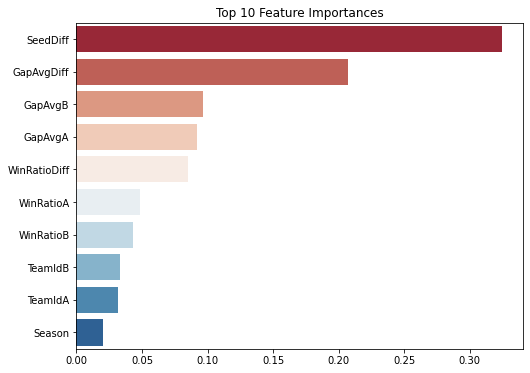

In [ ]:
# Feature의 중요도 확인
import matplotlib.pyplot as plt
import seaborn as sns

rf_importances_values = model.feature_importances_
rf_importances = pd.Series(rf_importances_values, index = X_train.columns)
rf_top10 = rf_importances.sort_values(ascending=False)[:10]

plt.rcParams["font.family"] = 'NanumBarunGothic'
plt.figure(figsize=(8,6))
plt.title('Top 10 Feature Importances')
sns.barplot(x=rf_top10, y=rf_top10.index,palette = "RdBu")
plt.show()

<h3>Gradient Boosting</h3>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier as grc
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, r2_score

# 다차원 배열을 1차원으로 평평하게 만들어주기!
# train_y = np.ravel(train_y, order='C')

model=grc(n_estimators=200,learning_rate=0.01,max_depth=8,min_samples_split=30,min_samples_leaf=15)
model.fit(X_train, Y1_train)

pred_y = model.predict(X_val)
# print("roc_auc_score on Test set : {0:.5f}".format(roc_auc_score(test_y,pred_y)))
print("accuracy_score on Test set : {0:.5f}".format(accuracy_score(Y1_val,pred_y)))

accuracy_score on Test set : 0.67174


In [ ]:
# confusion_matrix 그리기
print(confusion_matrix(Y1_val, model.predict(X_val)))

[[205  95]
 [ 99 192]]


In [ ]:
from sklearn.metrics import f1_score
f1_score(Y1_val, model.predict(X_val), average='weighted')

0.6716939151085342

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y1_val, model.predict(X_val))

print('정확도 {:.4f}'.format(accuracy))

정확도 0.6717


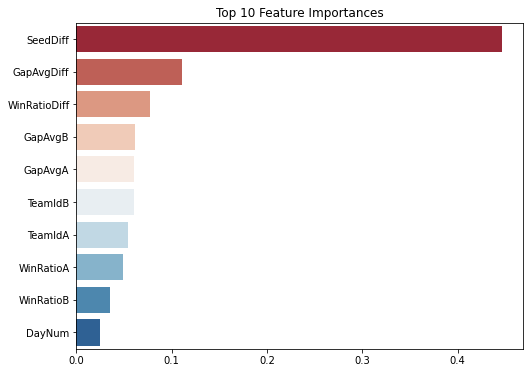

In [ ]:
# Feature의 중요도 확인
import matplotlib.pyplot as plt
import seaborn as sns

grb_importances_values = model.feature_importances_
grb_importances = pd.Series(grb_importances_values, index = X_train.columns)
grb_top10 = grb_importances.sort_values(ascending=False)[:10]

plt.rcParams["font.family"] = 'NanumBarunGothic'
plt.figure(figsize=(8,6))
plt.title('Top 10 Feature Importances')
sns.barplot(x=grb_top10, y=grb_top10.index,palette = "RdBu")
plt.show()

<h3>XGBoost</h3>

In [ ]:
from xgboost import XGBClassifier as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, r2_score

# 다차원 배열을 1차원으로 평평하게 만들어주기!
# train_y = np.ravel(train_y, order='C')

model=xgb(n_estimators=500,gamma=1,eta=0.01,max_depth=8,reg_lambda=5,reg_alpha=5)
model.fit(X_train, Y1_train)

pred_y = model.predict(X_val)
# print("roc_auc_score on Test set : {0:.5f}".format(roc_auc_score(test_y,pred_y)))
print("accuracy_score on Test set : {0:.5f}".format(accuracy_score(Y1_val,pred_y)))

accuracy_score on Test set : 0.67005


In [ ]:
# confusion_matrix 그리기
print(confusion_matrix(Y1_val, model.predict(X_val)))

[[198 102]
 [ 93 198]]


In [ ]:
from sklearn.metrics import f1_score
f1_score(Y1_val, model.predict(X_val), average='weighted')

0.6700507614213199

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y1_val, model.predict(X_val))

print('정확도 {:.4f}'.format(accuracy))

정확도 0.6701


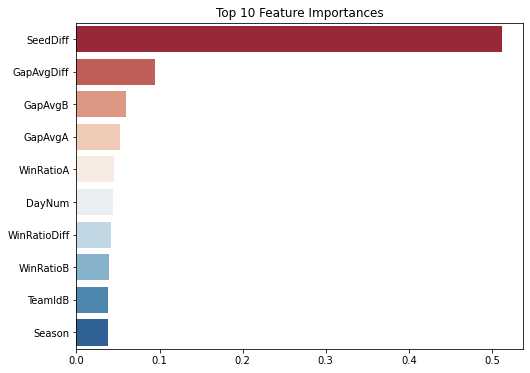

In [ ]:
# Feature의 중요도 확인
import matplotlib.pyplot as plt
import seaborn as sns

xgb_importances_values = model.feature_importances_
xgb_importances = pd.Series(xgb_importances_values, index = X_train.columns)
xgb_top10 = xgb_importances.sort_values(ascending=False)[:10]

plt.rcParams["font.family"] = 'NanumBarunGothic'
plt.figure(figsize=(8,6))
plt.title('Top 10 Feature Importances')
sns.barplot(x=xgb_top10, y=xgb_top10.index,palette = "RdBu")
plt.show()

<h3>Blended Model</h3>

In [ ]:
!pip install --pre pycaret

  Using cached pycaret-3.0.0rc4-py3-none-any.whl (487 kB)
  Using cached pyod-1.0.6.tar.gz (141 kB)
  Preparing metadata (setup.py) ... done
  Using cached tbats-1.1.2-py3-none-any.whl (43 kB)
  Using cached pmdarima-1.8.5-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.4 MB)
  Using cached schemdraw-0.15-py3-none-any.whl (106 kB)
  Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl (79.9 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached sktime-0.13.4-py3-none-any.whl (7.0 MB)
  Using cached plotly_resampler-0.8.3.tar.gz (45 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.9/224.9 kB 470.4 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.1/185.1 kB 2.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 3.3 MB/s eta 0:00:00

In [ ]:
from pycaret.classification import *

In [ ]:
X_train['Season'].unique()

array([2012, 2010, 2011, 2004, 2013, 2008, 2017, 2006, 2021, 2007, 2016,
       2003, 2019, 2014, 2009, 2015, 2018, 2005])

In [ ]:
X_val['Season'].unique()

array([2019, 2015, 2018, 2006, 2011, 2014, 2016, 2008, 2012, 2017, 2004,
       2009, 2010, 2013, 2005, 2003, 2007, 2021])

In [ ]:
X_val

,Season,DayNum,TeamIdA,TeamIdB,WinRatioA,GapAvgA,WinRatioB,GapAvgB,SeedDiff,WinRatioDiff,GapAvgDiff
1097,2019,139,1403,1138,0.812500,13.812500,0.909091,13.818182,-3,-0.096591,-0.005682
781,2015,134,1279,1140,0.625000,5.125000,0.718750,8.906250,0,-0.093750,-3.781250
1001,2018,137,1158,1120,0.774194,5.419355,0.781250,10.062500,9,-0.007056,-4.643145
250,2006,145,1417,1272,0.818182,9.454545,0.909091,15.030303,1,-0.090909,-5.575758
239,2006,139,1437,1112,0.862069,11.620690,0.612903,4.870968,-7,0.249166,6.749722
...,...,...,...,...,...,...,...,...,...,...,...
107,2004,139,1242,1334,0.714286,6.678571,0.766667,5.366667,-8,-0.052381,1.311905
821,2015,138,1417,1412,0.606061,3.969697,0.545455,0.818182,-3,0.060606,3.151515
1049,2019,134,1341,1192,0.636364,2.121212,0.580645,2.258065,0,0.055718,-0.136852
583,2012,136,1355,1124,0.781250,9.750000,0.787879,9.000000,11,-0.006629,0.750000


In [ ]:
X_train.reset_index(inplace=True, drop=True)
Y1_train.reset_index(inplace=True, drop=True)
X_val.reset_index(inplace=True, drop=True)
Y1_val.reset_index(inplace=True, drop=True)

In [ ]:
Y1_val

0      1
1      1
2      0
3      1
4      1
      ..
586    1
587    1
588    0
589    0
590    0
Name: WinA, Length: 591, dtype: int64

In [ ]:
Train = pd.concat([X_train, Y1_train], axis = 1)
Test = pd.concat([X_val, Y1_val], axis = 1)

In [ ]:
exp_name = setup(data = Train,  target = 'WinA')
best_3 = compare_models(n_select = 3)

,Description,Value
0,Session id,1705
1,Target,WinA
2,Target type,Binary
3,Original data shape,"(1771, 12)"
4,Transformed data shape,"(1771, 12)"
5,Transformed train set shape,"(1239, 12)"
6,Transformed test set shape,"(532, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7038,0.0000,0.6998,0.7092,0.7040,0.4076,0.4082,0.0310
lr,Logistic Regression,0.7022,0.7820,0.6950,0.7090,0.7014,0.4045,0.4052,0.5560
lda,Linear Discriminant Analysis,0.7022,0.7829,0.6998,0.7066,0.7028,0.4044,0.4049,0.0260
gbc,Gradient Boosting Classifier,0.6837,0.7614,0.6805,0.6883,0.6835,0.3673,0.3682,0.1540
rf,Random Forest Classifier,0.6828,0.7536,0.6676,0.6925,0.6786,0.3658,0.3672,0.2470
catboost,CatBoost Classifier,0.6812,0.7600,0.6741,0.6886,0.6800,0.3625,0.3640,2.9290
qda,Quadratic Discriminant Analysis,0.6788,0.7544,0.6790,0.6839,0.6804,0.3576,0.3588,0.0260
et,Extra Trees Classifier,0.6756,0.7528,0.6661,0.6829,0.6727,0.3511,0.3529,0.1970
nb,Naive Bayes,0.6707,0.7566,0.6646,0.6773,0.6700,0.3415,0.3424,0.0290
xgboost,Extreme Gradient Boosting,0.6699,0.7329,0.6613,0.6775,0.6674,0.3400,0.3419,0.2970


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

In [ ]:
blended = blend_models(estimator_list = best_3, fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7137,0.0000,0.7120,0.7177,0.7149,0.4274,0.4274
1,0.6976,0.0000,0.6640,0.7155,0.6888,0.3955,0.3965
2,0.6573,0.0000,0.6880,0.6515,0.6693,0.3142,0.3147
3,0.7460,0.0000,0.7500,0.7440,0.7470,0.4919,0.4920
4,0.7045,0.0000,0.6613,0.7257,0.6920,0.4091,0.4107
Mean,0.7038,0.0000,0.6951,0.7109,0.7024,0.4076,0.4083
Std,0.0286,0.0000,0.0330,0.0313,0.0266,0.0572,0.0571


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
save_model(blended, 'WinA')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Season', 'DayNum', 'TeamIdA',
                                              'TeamIdB', 'WinRatioA', 'GapAvgA',
                                              'WinRatioB', 'GapAvgB', 'SeedDiff',
                                              'WinRatioDiff', 'GapAvgDiff'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose...
                                                                   pena

In [ ]:
final_model = finalize_model(blended)

In [ ]:
predict_model(final_model, Test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.6870,0.6873,0.7113,0.6721,0.6912,0.3743,0.3750


,Season,DayNum,TeamIdA,TeamIdB,WinRatioA,GapAvgA,WinRatioB,GapAvgB,SeedDiff,WinRatioDiff,GapAvgDiff,WinA,prediction_label
0,2019.0,139.0,1403.0,1138.0,0.812500,13.812500,0.909091,13.818182,-3.0,-0.096591,-0.005682,1,1
1,2015.0,134.0,1279.0,1140.0,0.625000,5.125000,0.718750,8.906250,0.0,-0.093750,-3.781250,1,0
2,2018.0,137.0,1158.0,1120.0,0.774194,5.419355,0.781250,10.062500,9.0,-0.007056,-4.643145,0,0
3,2006.0,145.0,1417.0,1272.0,0.818182,9.454545,0.909091,15.030303,1.0,-0.090909,-5.575758,1,0
4,2006.0,139.0,1437.0,1112.0,0.862069,11.620689,0.612903,4.870968,-7.0,0.249166,6.749722,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,2004.0,139.0,1242.0,1334.0,0.714286,6.678571,0.766667,5.366667,-8.0,-0.052381,1.311905,1,1
587,2015.0,138.0,1417.0,1412.0,0.606061,3.969697,0.545455,0.818182,-3.0,0.060606,3.151515,1,1
588,2019.0,134.0,1341.0,1192.0,0.636364,2.121212,0.580645,2.258065,0.0,0.055718,-0.136852,0,0
589,2012.0,136.0,1355.0,1124.0,0.781250,9.750000,0.787879,9.000000,11.0,-0.006629,0.750000,0,0


In [ ]:
Train

,Season,DayNum,TeamIdA,TeamIdB,WinRatioA,GapAvgA,WinRatioB,GapAvgB,SeedDiff,WinRatioDiff,GapAvgDiff,WinA
0,2012,137,1281,1313,0.882353,14.558824,0.750000,2.812500,-13,0.132353,11.746324,0
1,2010,152,1139,1277,0.875000,10.062500,0.750000,8.937500,0,0.125000,1.125000,1
2,2011,136,1211,1385,0.718750,10.687500,0.656250,3.656250,5,0.062500,7.031250,1
3,2004,152,1210,1329,0.718750,10.781250,0.896552,14.310345,1,-0.177802,-3.529095,1
4,2013,139,1279,1247,0.764706,10.617647,0.700000,6.466667,-1,0.064706,4.150980,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1766,2010,136,1139,1431,0.875000,10.062500,0.812500,11.593750,-7,0.062500,-1.531250,1
1767,2019,138,1278,1277,0.617647,1.617647,0.823529,13.294118,8,-0.205882,-11.676471,0
1768,2021,154,1211,1124,1.000000,23.000000,0.916667,17.958333,0,0.083333,5.041667,0
1769,2016,136,1214,1438,0.666667,0.900000,0.787879,10.696970,15,-0.121212,-9.796970,0


주요 참고 노트북: 데이터 전처리 및 변수선택, 모델링 부분<br>
https://www.kaggle.com/theoviel/ncaa-starter-the-simpler-the-better

기타 노트북:
https://www.kaggle.com/code/wodlfrh/tutorial

기타 자료: 모델링 부분<br>
2022fall_딥러닝수업조별과제[머신러닝 기법을 활용한 
한국프로야구 2019 정규시즌 좌석점유율 예측]<br>

참고 웹페이지:
* 마크다운 작성법: https://leedakyeong.tistory.com/entry/Markdown-Jupyter-Notebook-%EC%A3%BC%ED%94%BC%ED%84%B0-%EB%85%B8%ED%8A%B8%EB%B6%81-%EB%A7%88%ED%81%AC%EB%8B%A4%EC%9A%B4-%EC%A0%95%EB%A6%AC<br>
* 탐색적 데이터 분석(EDA): https://blog.naver.com/oremess/222857971881<br>
* Matplotlib_1: https://jfun.tistory.com/63<br>
* Matplotlib_2: https://blog.naver.com/PostView.naver?blogId=wideeyed&logNo=222120809674&parentCategoryNo=&categoryNo=&viewDate=&isShowPopularPosts=false&from=postView<br>
* Matplotlib_3: https://agronomy4future.org/?p=11467#:~:text=1)%20%EC%B6%95%20%EB%B2%94%EC%9C%84%20%EC%84%A4%EC%A0%95,%EC%B6%95%20%EB%B2%94%EC%9C%84%EB%A5%BC%20%EC%84%A4%EC%A0%95%ED%95%A9%EB%8B%88%EB%8B%A4<br>
* Pandas_1_데이터병합: https://yganalyst.github.io/data_handling/Pd_12/<br>
* Pandas_2_데이터 조회: https://gooopy.tistory.com/135<br>
* 결측값 처리: https://hyemin-kim.github.io/2020/06/12/S-Python-Pandas6/<br>
